In [1]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [ ]:
vbf_sm_process = Process("vbf_sm", "VBFSM", color=(0, 0, 0))
vbf = Dataset("vbf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             vbf_sm_process,
             prefix="cmsxrootd-1.gridka.de:1094/")

latino = Dataset("lat",
                "/store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/",
                vbf_sm_process,
                prefix="eoscms.cern.ch/")

pprint(latino.get_files()[0:10])

In [7]:
ggf_sm_process = Process("ggf_sm", "GGFSM", color=(0, 0, 0))
ggf = Dataset("ggf_sm",
             # "/store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             "/eos/user/j/jleonhol/HH/ggf_2018_nanotest2/",
             ggf_sm_process,)
             #prefix="cms-xrd-global.cern.ch/",
             #locate="ingrid-se04.cism.ucl.ac.be:1094/")
# pprint(ggf.get_files()[0:])

In [ ]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:])

In [8]:
# lets plot stuff using ROOT RDataFrame
import ROOT
ROOT.ROOT.EnableImplicitMT()
files = ggf.get_files()#[:1]
#files = ["root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root"]
#files = ["root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root"]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

#files = latino.get_files()[0:1]
#dataframe_files = ROOT.vector(str)()
#for f in files:
#    dataframe_files.push_back(f)
#lat_df = ROOT.RDataFrame("Events", dataframe_files)
#pprint ([col for col in df.GetColumnNames() if col not in lat_df.GetColumnNames()])

In [4]:
print files
#files = ["root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root"]

['root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root', 'root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/1B43C008-B70B-8E4B-976F-1CE0E6E2AE86.root', 'root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/3C2491D7-84F8-E14E-8558-E70A1599E2A3.root', 'root://cms-xrd-global.cern.ch//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/110000/5B165784-4A22-8141-89DB-B58884B2844D.root', 'root://cms-xrd-global.cern

In [12]:
print [col for col in df.GetColumnNames() if "event".lower() in col.lower()]

['event', 'Flag_hcalLaserEventFilter']


# DeepTau

### Tau_idDeepTau2017v2p1VSmu

bitmask 1 = VLoose, 2 = Loose, 4 = Medium, 8 = Tight

This actually translates to
1 = VLoose, 3 = Loose, 7 = Medium, 15 = Tight

### Tau_idDeepTau2017v2p1VSe 

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255

### Tau_idDeepTau2017v2p1VSjet

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255


In [8]:
ROOT.gInterpreter.Declare("""
    bool is_wp(unsigned char v, int initial, int final){
         if ((int(v) >= int(std::pow(2, initial)) - 1) && (int(v) <= int(std::pow(2, final)) - 1)) return true;
         return false;
    }
""")

ROOT.gInterpreter.Declare("""
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<unsigned char> vec_wp(Vchar v, int initial, int final){
        ROOT::RVec<unsigned char> a;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) a.push_back(v[i]);
        }
        return a;
    }
""")
ROOT.gInterpreter.Declare("""
    using Vbool = const ROOT::RVec<bool>&;
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<bool> are_wp(Vchar v, int initial, int final){
        ROOT::RVec<bool> wps;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) wps.push_back(true);
            else wps.push_back(false);
        }
        return wps;
    }
""")


True

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
#hist2 = df.Define("loose_vs_mu", 'wp(Tau_idDeepTau2017v2p1VSmu, (unsigned char*)("Loose"))').Histo1D("loose_vs_mu")
#new_df = df.Filter("Tau_idDeepTau2017v2p1VSmu[(Tau_idDeepTau2017v2p1VSmu & 3) > 0]")
histo3 = df.Define("wp","vec_wp(Tau_idDeepTau2017v2p1VSmu, 1, 2)").Histo1D("wp")
histo3.Draw()
c.Draw()

In [ ]:
ROOT.gInterpreter.Declare("""
    using VBool = const ROOT::RVec<Bool_t>&;
    using Vint = const ROOT::RVec<int>&;
    ROOT::RVec<int> get_dm(Vint dm){
        ROOT::RVec<int> int_dm;
        for (int i = 0; i < dm.size(); i++){
            if (dm[i]) int_dm.push_back(1);
            else int_dm.push_back(0);
        }
        return int_dm;
    }
""")

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
histo7 = df.Define("dm", "get_dm(Tau_idDecayModeNewDMs)").Histo1D("dm")
histo7.Draw()
c.Draw()

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


In [7]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    float gen_part_inv_mass(Vfloat inp_pt, Vfloat inp_eta, Vfloat inp_phi, Vfloat inp_mass, Vint inp_id, int id){
        ROOT::RVec<float> pt, eta, phi, mass;
        for (size_t i = 0; i < inp_pt.size(); i++) {
            if (abs(inp_id[i]) == id) {
                pt.push_back(inp_pt[i]);
                eta.push_back(inp_eta[i]);
                phi.push_back(inp_phi[i]);
                mass.push_back(inp_mass[i]);
            }
        }
        if (pt.size() != 2) return -1;
        return InvariantMass(pt, eta, phi, mass);
    }
""")

True

In [6]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    int nGen(Vint inp_id, int id){
        int n = 0;
        for (size_t i = 0; i < inp_id.size(); i++) {
            if (abs(inp_id[i]) == id) {
                n++;
            }
        }
        return n;
    }
""")

True

In [5]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    int nGenGoodMother (Vint pdgs, Vint mother_indexes, Vint status, int pdgid, int mother_pdgid, int mother_status){
        int n = 0;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (abs(pdgs[i]) != pdgid) continue;
            if (abs(pdgs[mother_indexes[i]]) != mother_pdgid) continue;
            if (status[mother_indexes[i]] != mother_status) continue;
            n++;
        }
        return n;
    }
""")

True

In [8]:
# invariant mass from the two taus
df_ditau = df.Define("nGenTau", "nGen(GenPart_pdgId[GenPart_status == 2], 15)").Filter("nGenTau == 2")
hmodel = ("Ditau_mass","Ditau Mass [GeV]",50, 0, 500.)
ditau_mass = df_ditau.Define("Ditau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "Ditau_mass")
ditau_mass_eta = df_ditau.Define("Ditau_mass_eta", "InvariantMass(Tau_pt[abs(Tau_eta) < 2.1], Tau_eta[abs(Tau_eta) < 2.1], Tau_phi[abs(Tau_eta) < 2.1], Tau_mass[abs(Tau_eta) < 2.1])").Histo1D(hmodel, "Ditau_mass_eta")
digentau_mass = df_ditau.Define("Digentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "Digentau_mass")
digenparttau_mass = df_ditau.Define("Digenparttau_mass", "gen_part_inv_mass(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 15)").Histo1D(hmodel, "Digenparttau_mass")

hmodel = ("nTau","nTau",5, 0, 5.)
nTau = df.Histo1D(hmodel, "nTau")
nGenVisTau = df.Histo1D(hmodel, "nGenVisTau")
nGenTau = df.Define("nGenTau", "nGen(GenPart_pdgId[GenPart_status == 2], 15)").Histo1D(hmodel, "nGenTau")
nGenEleFromTau = df.Define("nGenEleFromTau", "nGenGoodMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_status, 11, 15, 2)").Histo1D(hmodel, "nGenEleFromTau")
nGenMuFromTau = df.Define("nGenMuFromTau", "nGenGoodMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_status, 13, 15, 2)").Histo1D(hmodel, "nGenMuFromTau")

nGenTauPt10 = df.Define("nGenTauPt10", "nGen(GenPart_pdgId[GenPart_status == 2 && GenPart_pt > 10], 15)").Histo1D(hmodel, "nGenTauPt10")
nGenEleFromTauPt10 = df.Define("nGenEleFromTauPt10", "nGenGoodMother(GenPart_pdgId[GenPart_pt > 10], GenPart_genPartIdxMother[GenPart_pt > 10], GenPart_status[GenPart_pt > 10], 11, 15, 2)").Histo1D(hmodel, "nGenEleFromTauPt10")
nGenMuFromTauPt10 = df.Define("nGenMuFromTauPt10", "nGenGoodMother(GenPart_pdgId[GenPart_pt > 10], GenPart_genPartIdxMother[GenPart_pt > 10], GenPart_status[GenPart_pt > 10], 13, 15, 2)").Histo1D(hmodel, "nGenMuFromTauPt10")

#nGenPart = df.Histo1D(hmodel, "nGenPart")

In [10]:
# What happens to the invariant mass if we only have 1 tau?
df_monotau = df.Filter("nGenVisTau == 1").Filter("nTau == 1")
hmodel = ("monotau_mass","monotau Mass [GeV]",10, -5, 5.)
tau_mass = df_monotau.Define("tau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "tau_mass")
gentau_mass = df_monotau.Define("gentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "gentau_mass")

In [5]:
hmodel = ("tau_eta","tau_eta; eta; events",50, -5, 5.)
Tau_eta = df.Histo1D(hmodel, "Tau_eta")
GenVisTau_eta = df.Histo1D(hmodel, "GenVisTau_eta")


In [ ]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float leading_pt(Vfloat pt){
        if (pt.size() < 1) return -1;
        if (pt.size() == 1) return pt[0];
        if (pt[1] > pt[0]) return pt[1];
        else return pt[0];
    }
    float subleading_pt(Vfloat pt){
        if (pt.size() < 2) return -1;
        if (pt[0] > pt[1]) return pt[1];
        else return pt[0];
    }
""")

In [ ]:
hmodel = ("Leading_tau_pt","Leading_tau_pt [GeV]",25, 0, 200.)
lead_tau_pt = df_ditau.Define("lead_tau_pt", "leading_pt(Tau_pt)").Histo1D(hmodel, "lead_tau_pt")
lead_gentau_pt = df_ditau.Define("lead_gentau_pt", "leading_pt(GenVisTau_pt)").Histo1D(hmodel, "lead_gentau_pt")

hmodel = ("Subleading_tau_pt","subleading_tau_pt [GeV]",25, 0, 200.)
sublead_tau_pt = df_ditau.Define("sublead_tau_pt", "subleading_pt(Tau_pt)").Histo1D(hmodel, "sublead_tau_pt")
sublead_gentau_pt = df_ditau.Define("sublead_gentau_pt", "subleading_pt(GenVisTau_pt)").Histo1D(hmodel, "sublead_gentau_pt")


In [19]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> deltaRGenReco(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> deltaR;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                deltaR.push_back(fabs(v1.DeltaR(v2)));
            }
        }
        return deltaR;
    }
""")

True

In [15]:
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 5.)
deltar_gen_reco = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 0.1)
deltar_gen_reco_zoomed = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")


NameError: name 'df_ditau' is not defined

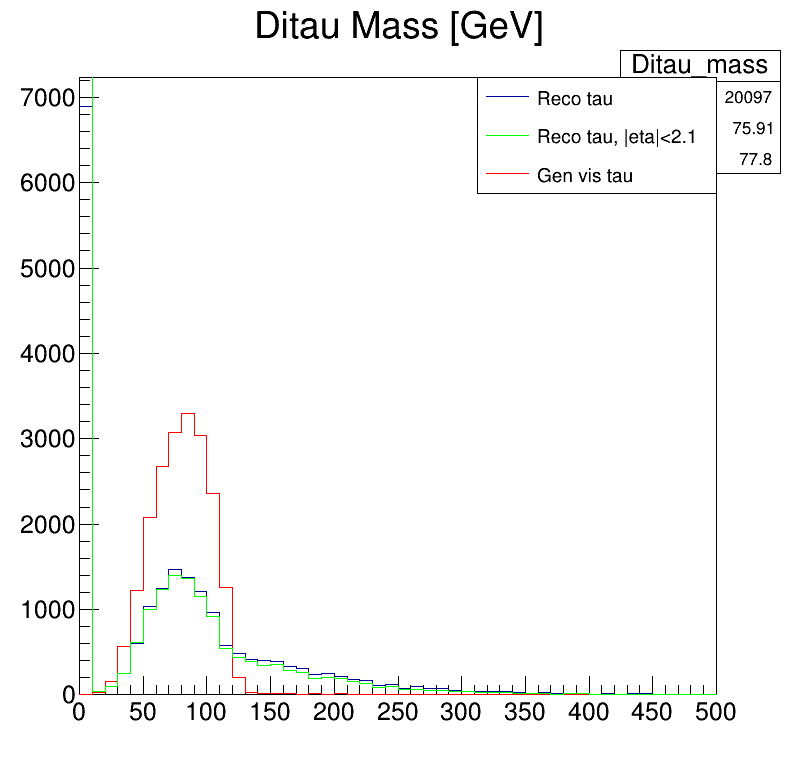

In [19]:
# invariant mass from the two taus
c = ROOT.TCanvas("", "", 800, 800)

#h3 = digenparttau_mass.Clone()



h1 = ditau_mass.Clone()
h1.Draw("same")
h2 = digentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")


h3 = ditau_mass_eta.Clone()
h3.SetLineColor(ROOT.kGreen)
h3.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h3, "Reco tau, |eta|<2.1", "l")
leg.AddEntry(h2, "Gen vis tau", "l")


leg.Draw("same")
c.Draw()

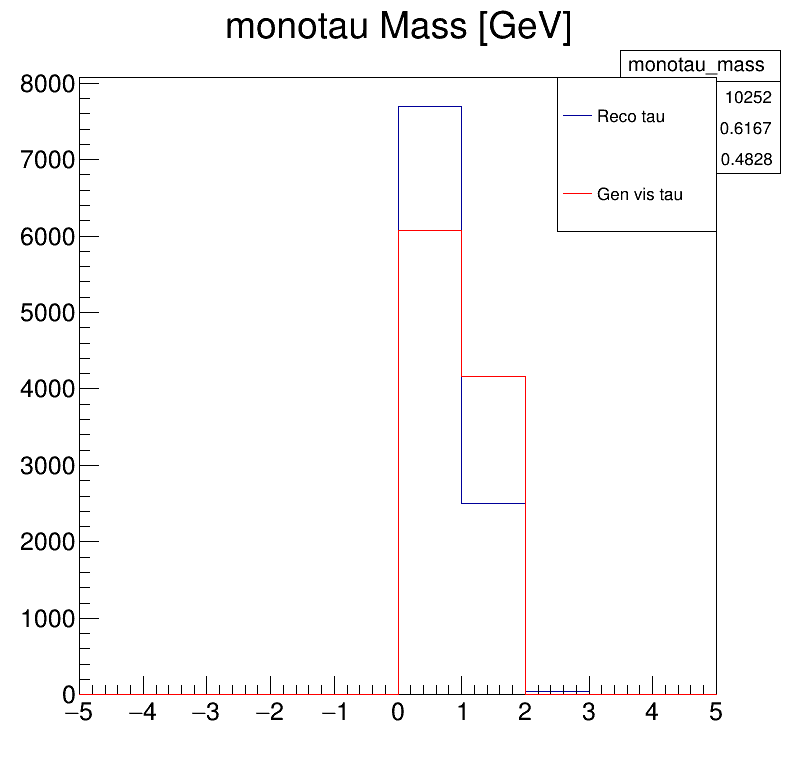

In [11]:
# invariant mass from the mono tau
c = ROOT.TCanvas("", "", 800, 800)

h1 = tau_mass.Clone()
h1.Draw("same")
h2 = gentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")




leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Gen vis tau", "l")

leg.Draw("same")
c.Draw()

In [ ]:
# leading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = lead_tau_pt.Clone()
h1.Draw()
h2 = lead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# subleading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = sublead_tau_pt.Clone()

h2 = sublead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw()
    h2.Draw("same")
else:
    h2.Draw()
    h1.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco.Clone()
h1.Draw()
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_zoomed.Clone()
h1.Draw()
c.Draw()

In [19]:
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt
# let's define a function that returns the efficient pts
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
        ROOT::RVec<float> efficient_pts;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < threshold) {
                  efficient_pts.push_back(pt1[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_pts;
    }
""")

ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_feat(Vfloat feat, Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
        ROOT::RVec<float> efficient_feats;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < threshold) {
                  efficient_feats.push_back(feat[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_feats;
    }
""")


True

In [11]:
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_gen_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")
efficient_gen_pts_eta = df_ditau.Define("efficient_gen_pts_eta", "efficient_gen_pts(GenVisTau_pt[abs(GenVisTau_eta) < 2.1], GenVisTau_eta[abs(GenVisTau_eta) < 2.1], GenVisTau_phi[abs(GenVisTau_eta) < 2.1], GenVisTau_mass[abs(GenVisTau_eta) < 2.1], Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts_eta")

efficient_gen_pts_deeptau_eta = df_ditau.Define("efficient_gen_pts_deeptau_eta", "efficient_gen_pts(GenVisTau_pt[abs(GenVisTau_eta) < 2.1], GenVisTau_eta[abs(GenVisTau_eta) < 2.1], GenVisTau_phi[abs(GenVisTau_eta) < 2.1], GenVisTau_mass[abs(GenVisTau_eta) < 2.1], Tau_pt[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_eta[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_phi[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_mass[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], 0.1)").Histo1D(hmodel, "efficient_gen_pts_deeptau_eta")

all_gen_pts = df_ditau.Histo1D(hmodel, "GenVisTau_pt")
all_gen_pts_eta = df_ditau.Define("GenVisTau_pt_eta", "GenVisTau_pt[abs(GenVisTau_eta)<2.1]").Histo1D(hmodel, "GenVisTau_pt_eta")



efficient_genpart_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")


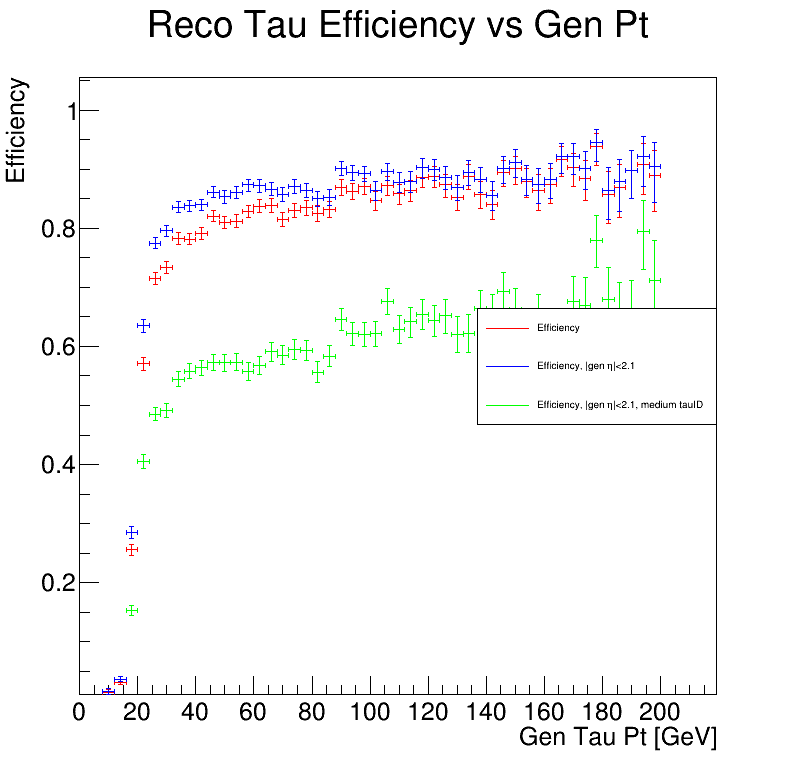

In [13]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = all_gen_pts.Clone()

h3 = efficient_gen_pts_eta.Clone()
h3_id = efficient_gen_pts_deeptau_eta.Clone()
h4 = all_gen_pts_eta.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)
eff_eta = ROOT.TEfficiency(h3, h4)
eff_eta.SetLineColor(ROOT.kBlue)

eff_mediumid = ROOT.TEfficiency(h3_id, h4)
eff_mediumid.SetLineColor(ROOT.kGreen)

eff.SetTitle("Reco Tau Efficiency vs Gen Pt; Gen Tau Pt [GeV]; Efficiency")



leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "Efficiency", "l")
leg.AddEntry(eff_eta, "Efficiency, |gen #eta|<2.1", "l")
leg.AddEntry(eff_mediumid, "Efficiency, |gen #eta|<2.1, medium tauID", "l")

eff.Draw()
eff_eta.Draw("same")
eff_mediumid.Draw("same")
leg.Draw("same")
# h2.Draw()
# h1.Draw("same")
c.Draw()

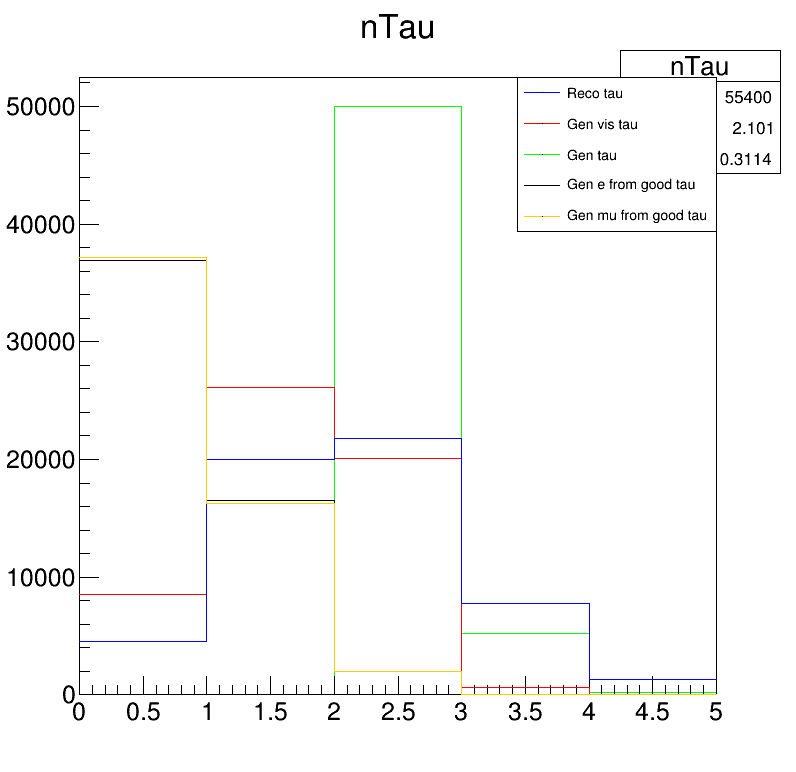

In [22]:
# Distribution of nTau and nGenTau
c = ROOT.TCanvas("", "", 800, 800)
h1 = nTau.Clone()
h2 = nGenVisTau.Clone()
h3 = nGenTau.Clone()
h4 = nGenEleFromTau.Clone()
h5 = nGenMuFromTau.Clone()

#h3 = nGenTauPt10.Clone()
#h4 = nGenEleFromTauPt10.Clone()
#h5 = nGenMuFromTauPt10.Clone()

#h4 = nGenPart.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kBlack)
h5.SetLineColor(ROOT.kOrange)

leg = ROOT.TLegend(0.65, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")
leg.AddEntry(h3, "Gen tau")
leg.AddEntry(h4, "Gen e from good tau")
leg.AddEntry(h5, "Gen mu from good tau")
#leg.AddEntry(h4, "Gen part")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    if h1.GetMaximum() > h3.GetMaximum():
        h1.Draw("same")
        h2.Draw("same")
        h3.Draw("same")
    else:
        h3.Draw("same")
        h2.Draw("same")
        h1.Draw("same")
elif h2.GetMaximum() > h3.GetMaximum():
        h2.Draw("same")
        h1.Draw("same")
        h3.Draw("same")
else:
    h3.Draw("same")
    h2.Draw("same")
    h1.Draw("same")

h4.Draw("same")
h5.Draw("same")
    
leg.Draw()
c.Draw()

In [24]:
def get_content(h):
    value = 0
    for b in range(1, 1 + h.GetNbinsX()):
        value += (b - 1) * h.GetBinContent(b)
    return value

gentau = get_content(h3)
genvistau = get_content(h2)
gene = get_content(h4)
genmu = get_content(h5)

value = genvistau / gentau
import math
error = value * math.sqrt(1 / gentau + 1 / genvistau)

print value, error

print gene, genmu, ((gene + genmu) / gentau)

0.587113074266 0.00282977403588
20599.0 20274.0 0.351245209082


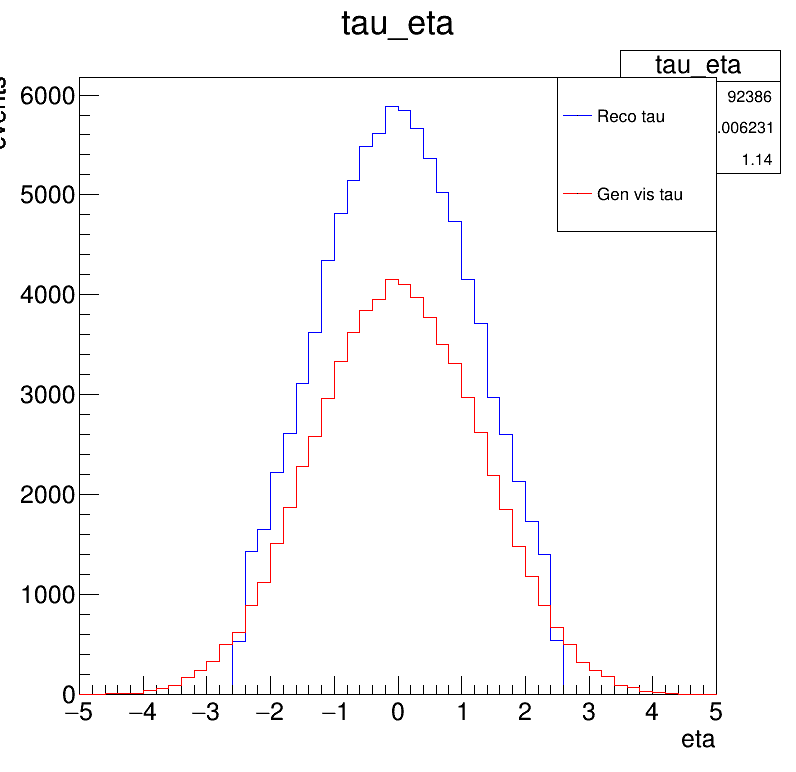

In [7]:
# Distribution of Tau_eta and GenVisTau_eta
c = ROOT.TCanvas("", "", 800, 800)
h1 = Tau_eta.Clone()
h2 = GenVisTau_eta.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

# btag

Our samples is from RunIIAutumn18, so the WPs must be taken from https://twiki.cern.ch/twiki/bin/viewauth/CMS/BtagRecommendation102X

|WP | Value|
| --- | --- |
|loose | 	0.0494 |
|medium |	0.2770 |
|tight |	0.7264 |

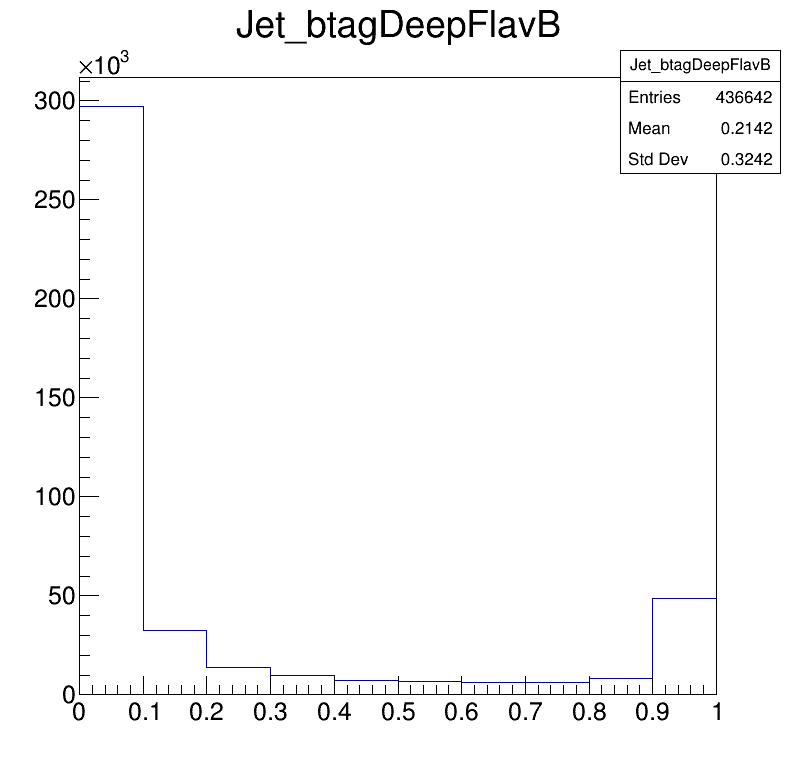

In [31]:


hmodel = ("Jet_btagDeepFlavB","Jet_btagDeepFlavB", 10, 0, 1)
Jet_btagDeepFlavB = df.Histo1D(hmodel, "Jet_btagDeepFlavB")
c = ROOT.TCanvas("", "", 800, 800)
Jet_btagDeepFlavB.Draw()
c.Draw()

In [41]:
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 5.)
deltar_gen_reco_jet = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 0.5)
deltar_gen_reco_jet_zoomed = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")

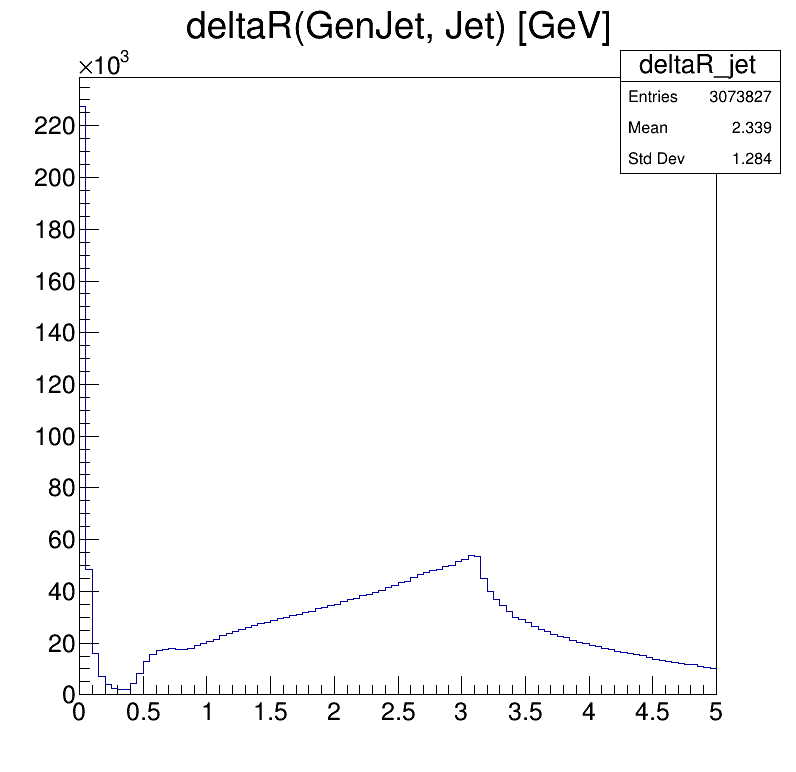

In [40]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet.Clone()
h1.Draw()
c.Draw()

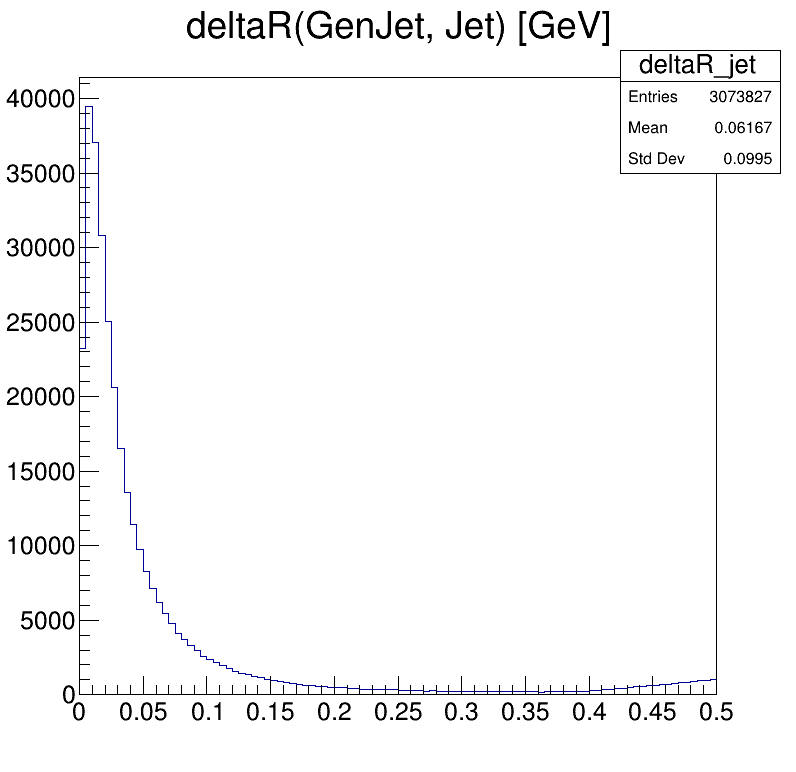

In [42]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet_zoomed.Clone()
h1.Draw()
c.Draw()

In [10]:
# lets take 0.3 as limit
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt


In [24]:
# pt
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_genjet_pts = df.Define("efficient_genjet_pts", "efficient_gen_pts(GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass, Jet_pt, Jet_eta, Jet_phi, Jet_mass, 0.3)").Histo1D(hmodel, "efficient_genjet_pts")
all_genjet_pts = df.Histo1D(hmodel, "GenJet_pt")


efficient_genb_pts = df.Define("efficient_genb_pts", "efficient_gen_pts(GenJet_pt[GenJet_hadronFlavour==5], GenJet_eta[GenJet_hadronFlavour==5], GenJet_phi[GenJet_hadronFlavour==5], GenJet_mass[GenJet_hadronFlavour==5], Jet_pt[Jet_btagDeepFlavB > 0.2770], Jet_eta[Jet_btagDeepFlavB > 0.2770], Jet_phi[Jet_btagDeepFlavB > 0.2770], Jet_mass[Jet_btagDeepFlavB > 0.2770], 0.3)").Histo1D(hmodel, "efficient_genb_pts")
all_genb_pts = df.Define("genb_pts", "GenJet_pt[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_pts")


# eta
hmodel = ("b #eta","b #eta", 50, -5, 5.)
efficient_genb_etas = df.Define("efficient_genjet_etas", "efficient_feat(GenJet_eta[GenJet_hadronFlavour==5], "
                                  "GenJet_pt[GenJet_hadronFlavour==5], GenJet_eta[GenJet_hadronFlavour==5], "
                                  "GenJet_phi[GenJet_hadronFlavour==5], GenJet_mass[GenJet_hadronFlavour==5], "
                                  "Jet_pt[Jet_btagDeepFlavB > 0.2770], Jet_eta[Jet_btagDeepFlavB > 0.2770], "
                                  "Jet_phi[Jet_btagDeepFlavB > 0.2770], Jet_mass[Jet_btagDeepFlavB > 0.2770], 0.3)"
                                 ).Histo1D(hmodel, "efficient_genjet_etas")
all_genb_etas = df.Define("genb_etas", "GenJet_eta[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_etas")

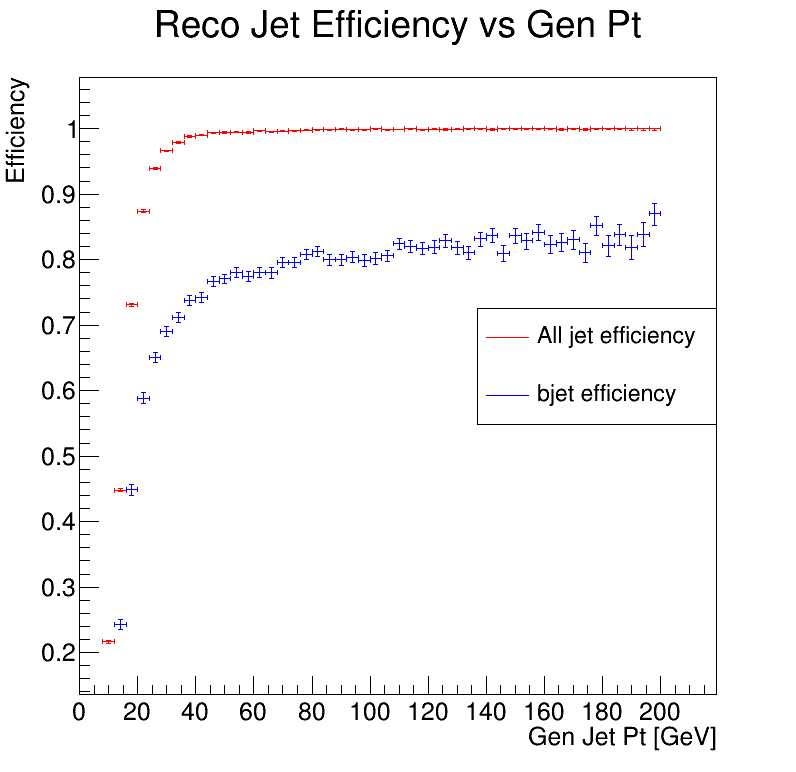

In [28]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_genjet_pts.Clone()
h2 = all_genjet_pts.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Reco Jet Efficiency vs Gen Pt; Gen Jet Pt [GeV]; Efficiency")

h3 = efficient_genb_pts.Clone()
h4 = all_genb_pts.Clone()

eff2 = ROOT.TEfficiency(h3, h4)
eff2.SetLineColor(ROOT.kBlue)


leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "All jet efficiency", "l")
leg.AddEntry(eff2, "bjet efficiency", "l")

eff.Draw()
eff2.Draw("same")
leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [16]:
hmodel = ("b #eta","b #eta", 50, -5, 5.)
all_genb_etas = df.Define("genb_eta", "GenJet_eta[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_eta")
all_recob_etas = df.Define("recob_eta", "Jet_eta[Jet_btagDeepFlavB > 0.2770]").Histo1D(hmodel, "recob_eta")

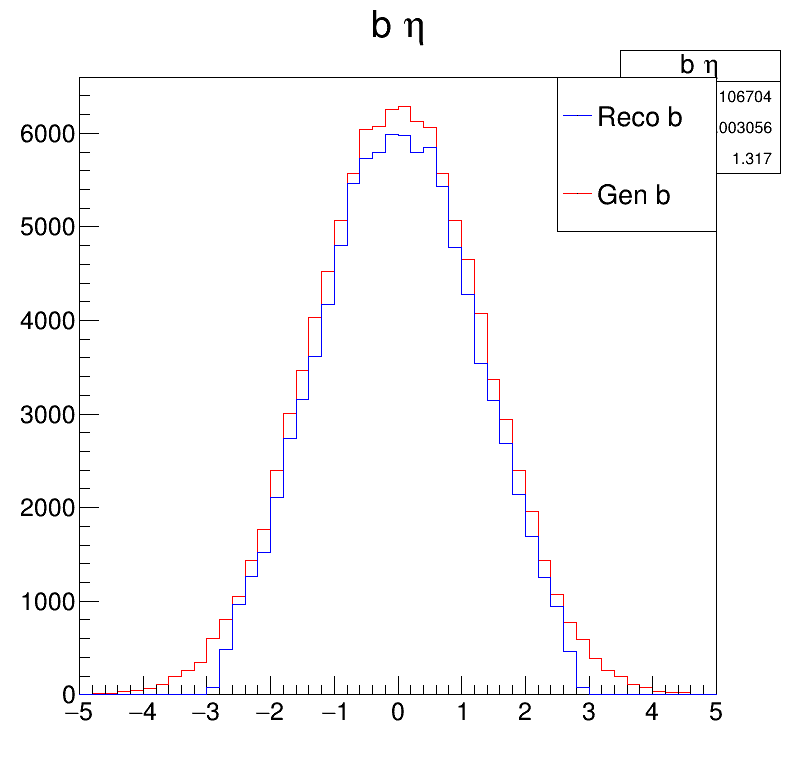

In [17]:
# Distribution of genb_eta and recob_eta
c = ROOT.TCanvas("", "", 800, 800)
h1 = all_recob_etas.Clone()
h2 = all_genb_etas.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco b")
leg.AddEntry(h2, "Gen b")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

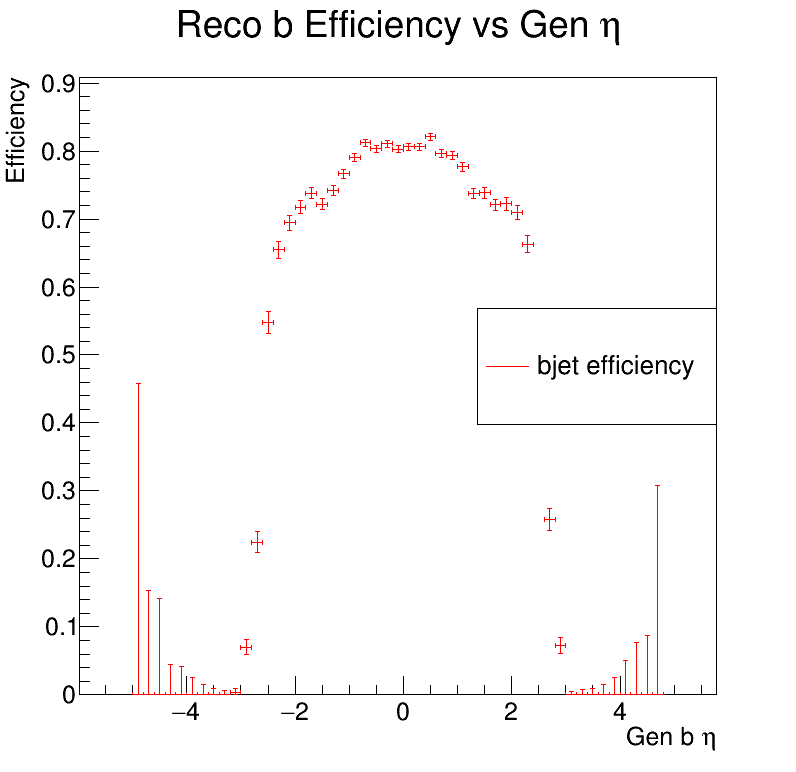

In [25]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_genb_etas.Clone()
h2 = all_genb_etas.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Reco b Efficiency vs Gen #eta; Gen b #eta; Efficiency")


leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "bjet efficiency", "l")

eff.Draw()
leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [28]:
# mother particles

ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_mother_particle_pdgids_bis (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> mother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
            }
            mother_pdgs.push_back(pdgs[mother_indexes[i]]);
        }
        return mother_pdgs;
    }
    ROOT::RVec<int> get_grandmother_particle_pdgid_bis (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> grandmother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
                if (abs(pdgs[mother_indexes[i]]) != pdgid) continue;
            }            
            grandmother_pdgs.push_back(pdgs[mother_indexes[mother_indexes[i]]]);
        }
        return grandmother_pdgs;
    }
""")

True

In [32]:
hmodel = ("Mother pdg ids","pdgid", 30, 0, 30)
gen_tau_mother_pdgids = df.Define("gen_muon_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")

In [30]:
hmodel = ("Mother pdg ids","pdgid", 2000, 0, 2000)
gen_tau_mother_pdgids = df.Define("gen_tau_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")
gen_tau_mother_pdgids_higgs = df.Define("gen_tau_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")

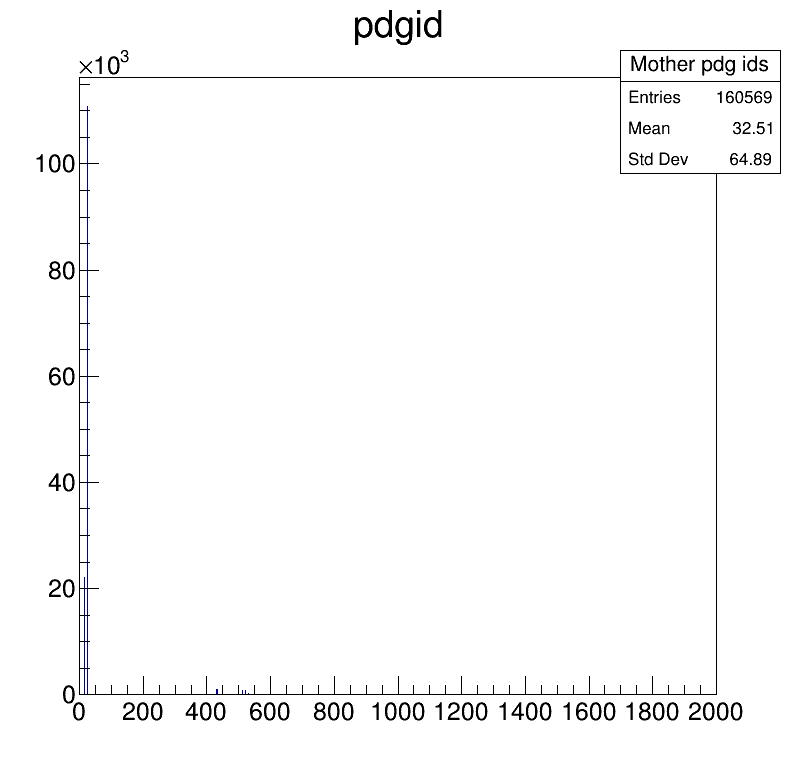

In [34]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_mother_pdgids.Clone()
#h1.GetXaxis().SetRangeUser(400, 600)
h1.Draw()
c.Draw()

In [36]:
tau = h1.GetBinContent(15 + 1)
higgs = h1.GetBinContent(25 + 1)
others = h1.Integral() - tau - higgs
print higgs, others

110800.0 2688.0


In [34]:
hmodel = ("Mother pdg ids","pdgid", 30, 0, 30)
gen_tau_h_mother_pdgids = df.Define("gen_tau_h_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, -1, GenVisTau_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_h_mother_pdgids")

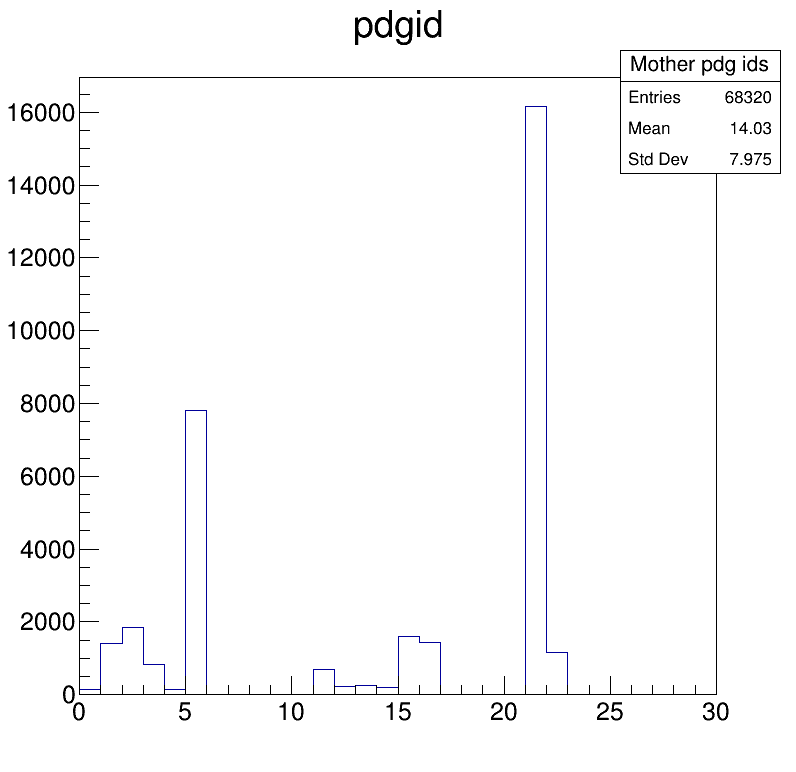

In [35]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_h_mother_pdgids.Clone()
h1.Draw()
c.Draw()

In [5]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&; 
    ROOT::RVec<int> get_good_indexes_bis (Vint pdgs, int pdgid, int initial_pdgid, Vint mother_indexes){
        ROOT::RVec<int> indexes_to_remove;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            int mother_index = mother_indexes[i];
            while (true) {
                if (abs(pdgs[mother_index]) != initial_pdgid) {
                    indexes_to_remove.push_back(mother_index);
                    mother_index = mother_indexes[mother_index];
                    if (mother_index == -1) break;
                } else break;
            }
        }
        ROOT::RVec<int> final_indexes;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            bool found = false;
            for (int j : indexes_to_remove) {
                if (i == j) found = true;
            }
            if (!found) final_indexes.push_back(i);
        }
        return final_indexes;
    }
""")

True

In [5]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&; 
    ROOT::RVec<float> get_good_vars (ROOT::RVec<int> good_indexes, Vfloat var){
        ROOT::RVec<float> good_vars;
        for (size_t i = 0; i < good_indexes.size(); i++) {
            good_vars.push_back(var[good_indexes[i]]);
        }
        return good_vars;
    }
""")

True

In [6]:
hmodel = ("Gen tau pt","Tau pt; pt[GeV]; events", 50, 0, 200)
good_pts = df.Define("good_gen_tau_pts", 
                     "get_good_vars(get_good_indexes_bis(GenPart_pdgId, 15, 25, GenPart_genPartIdxMother), GenPart_pt)"
                    ).Histo1D(hmodel, "good_gen_tau_pts")
all_pts = df.Define("all_gen_tau_pts", "GenPart_pt[abs(GenPart_pdgId) == 15]").Histo1D(hmodel, "all_gen_tau_pts")
genvistau_pt = df.Histo1D(hmodel, "GenVisTau_pt")
gentau_pt = df.Define("GoodGenTau_pt", "GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2]").Histo1D(hmodel, "GoodGenTau_pt") 

hmodel = ("Status","Status", 200, 0, 200)
good_status = df.Define("good_gen_tau_status", 
                     "get_good_vars(get_good_indexes_bis(GenPart_pdgId, 15, 25, GenPart_genPartIdxMother), GenPart_status)"
                    ).Histo1D(hmodel, "good_gen_tau_status")

TypeError: can not resolve method template call for 'Define'

input_line_83:4:8: error: use of undeclared identifier 'get_good_vars'
return get_good_vars(get_good_indexes_bis(GenPart_pdgId, 15, 25, GenPart_genPartIdxMother), GenPart_pt)
       ^


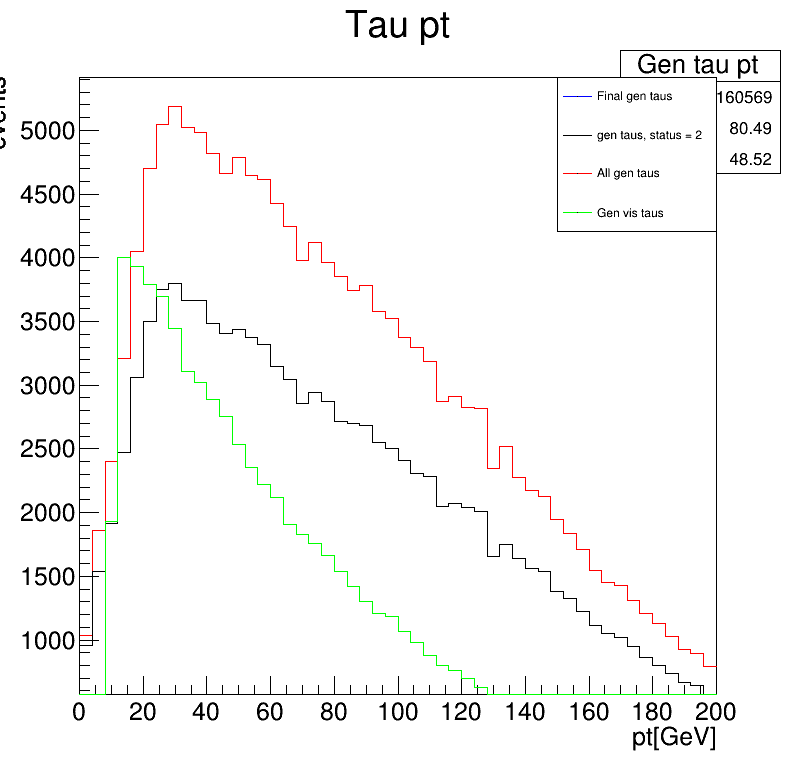

In [12]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = good_pts.Clone()
h2 = all_pts.Clone()
h3 = genvistau_pt.Clone()
h4 = gentau_pt.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kBlack)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Final gen taus")
leg.AddEntry(h4, "gen taus, status = 2")
leg.AddEntry(h2, "All gen taus")
leg.AddEntry(h3, "Gen vis taus")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")
h4.Draw("same")
h3.Draw("same")   

leg.Draw()
c.Draw()

In [34]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&; 
    ROOT::RVec<float> get_total_var_pdg_status (Vfloat genvar, Vint genpdg, Vint genstatus, int pdg, int status, Vint mother_indexes){
        ROOT::RVec<float> good_vars;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(genpdg[mother_indexes[i]]) == pdg && genstatus[mother_indexes[i]] == status)
                good_vars.push_back(genvar[mother_indexes[i]]);
        }
        return good_vars;
    }
""")

True

In [35]:
hmodel = ("Gen tau pt","Tau pt; pt[GeV]; events", 50, 0, 200)
visible_mother_pt = df.Define("visible_mother_pt", "get_total_var_pdg_status(GenPart_pt, GenPart_pdgId, GenPart_status, 15, 2, GenVisTau_genPartIdxMother)").Histo1D(hmodel, "visible_mother_pt") 


In [5]:
hmodel = ("deltaR","deltaR(GenTau, VisTau)", 100, 0, 5.)
deltar_gen_tau = df.Define("deltar_gen_tau", "deltaRGenReco(GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_eta[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_phi[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_mass[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_tau")


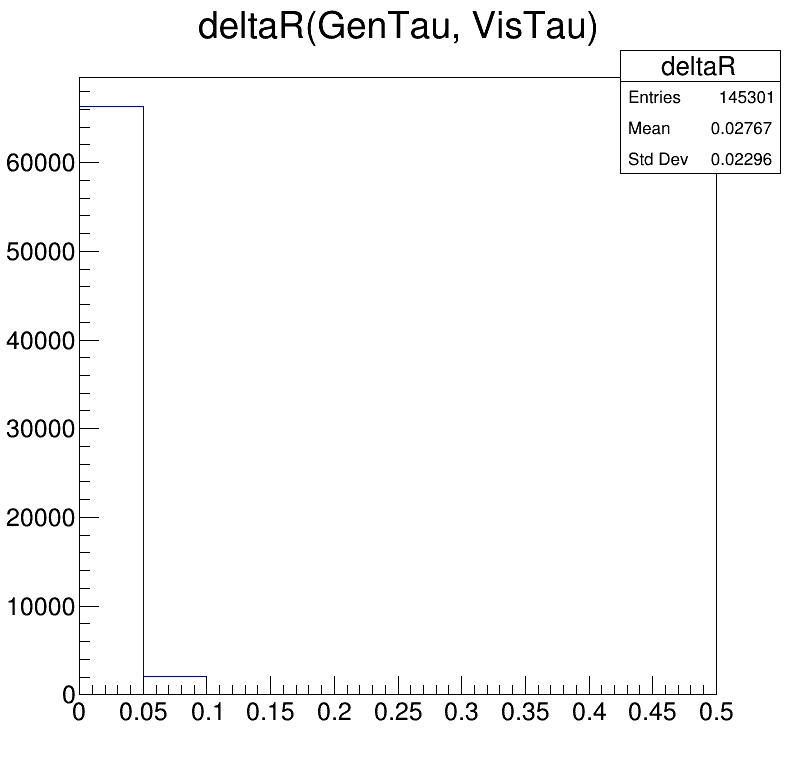

In [7]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_tau.Clone()
h1.GetXaxis().SetRangeUser(0, 0.5)
h1.Draw()
c.Draw()

In [6]:
hmodel = ("Gen tau pt","Tau pt; pt[GeV]; events", 50, 0, 200)

efficient_gen_pts = df.Define("efficient_gen_pts",
                              "efficient_feat(GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_eta[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_phi[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenPart_mass[abs(GenPart_pdgId) == 15 && GenPart_status == 2], GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")
gentau_pt = df.Define("GoodGenTau_pt", "GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2]").Histo1D(hmodel, "GoodGenTau_pt") 

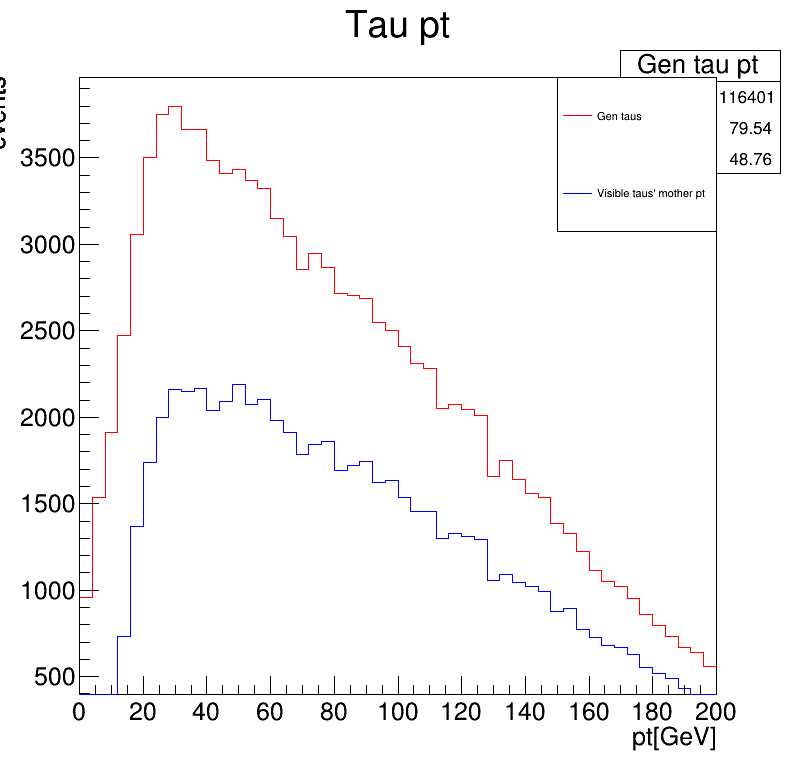

In [7]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = gentau_pt.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h2, "Gen taus")
leg.AddEntry(h1, "Visible taus' mother pt")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")
leg.Draw()
c.Draw()

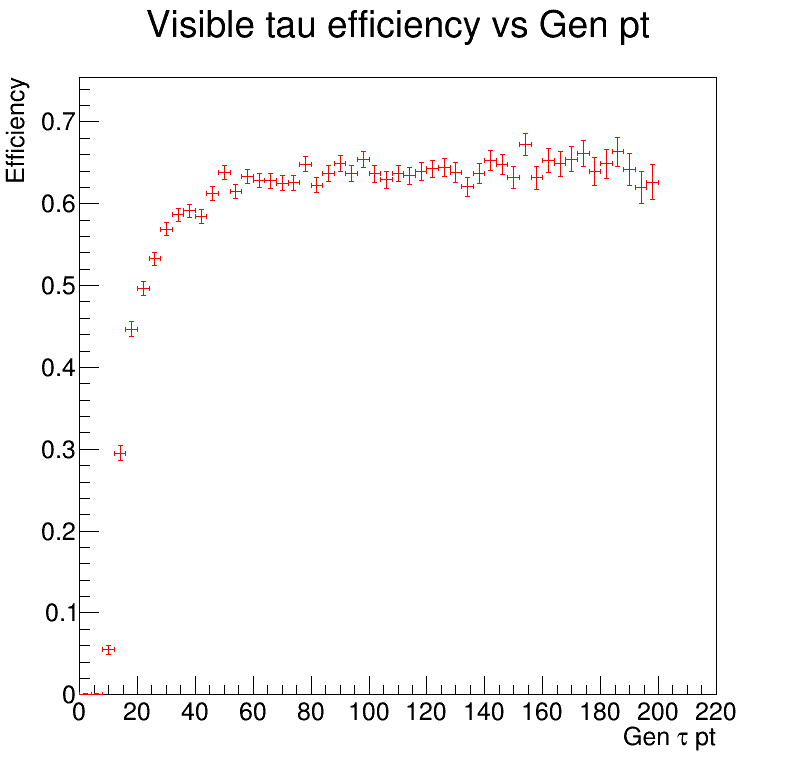

In [8]:
c = ROOT.TCanvas("", "", 800, 800)
#h1 = efficient_gen_pts.Clone()
#h2 = gentau_pt.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Visible tau efficiency vs Gen pt; Gen #tau pt; Efficiency")



eff.Draw()
#leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [20]:
hmodel = ("Gen tau eta","Tau eta; eta; events", 50, -5, 5)

efficient_gen_etas = df.Define("efficient_gen_etas",
                              "efficient_feat(GenPart_eta[abs(GenPart_pdgId) == 15 && GenPart_status == 2 && GenPart_pt > 40], GenPart_pt[abs(GenPart_pdgId) == 15 && GenPart_status == 2 && GenPart_pt > 40], GenPart_eta[abs(GenPart_pdgId) == 15 && GenPart_status == 2 && GenPart_pt > 40], GenPart_phi[abs(GenPart_pdgId) == 15 && GenPart_status == 2 && GenPart_pt > 40], GenPart_mass[abs(GenPart_pdgId) == 15 && GenPart_status == 2 && GenPart_pt > 40], GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_etas")
gentau_eta = df.Define("GoodGenTau_eta", "GenPart_eta[abs(GenPart_pdgId) == 15 && GenPart_status == 2 ]").Histo1D(hmodel, "GoodGenTau_eta") 

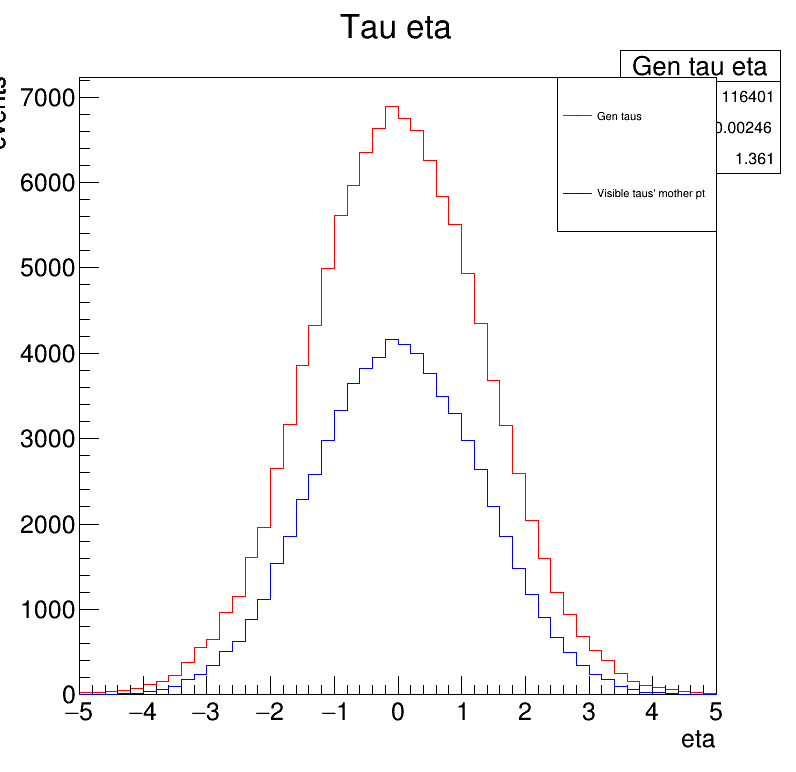

In [7]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_etas.Clone()
h2 = gentau_eta.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h2, "Gen taus")
leg.AddEntry(h1, "Visible taus' mother pt")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")
leg.Draw()
c.Draw()

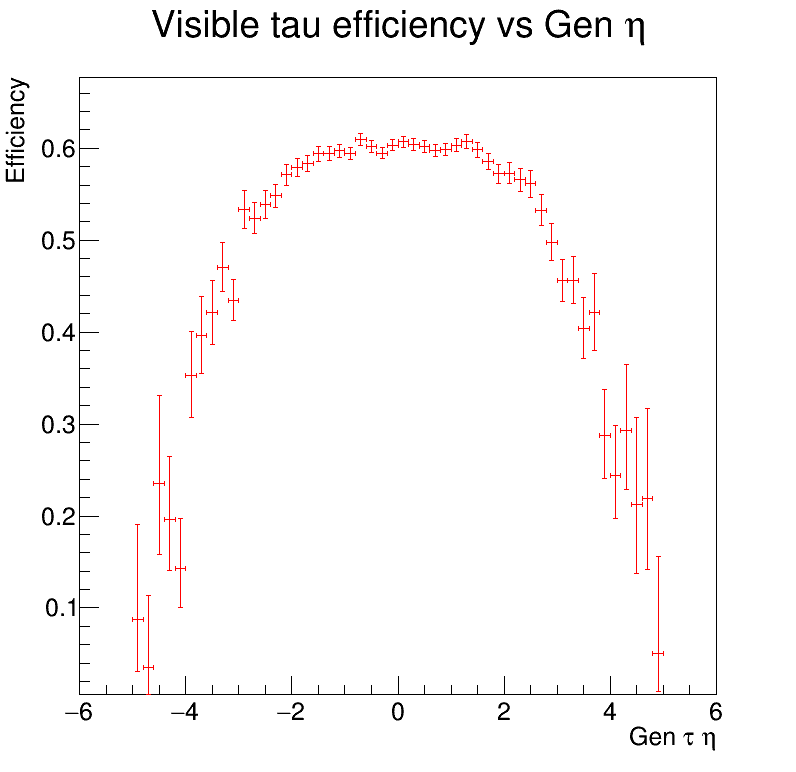

In [9]:
c = ROOT.TCanvas("", "", 800, 800)
#h1 = efficient_gen_pts.Clone()
#h2 = gentau_pt.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Visible tau efficiency vs Gen #eta; Gen #tau #eta; Efficiency")



eff.Draw()
#leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [11]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&; 
    ROOT::RVec<int> get_bad_indexes (Vint pdgs, int pdgid, int initial_pdgid, Vint mother_indexes){
        ROOT::RVec<int> indexes_to_remove;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            int mother_index = mother_indexes[i];
            if (abs(pdgs[mother_index]) == initial_pdgid) {
                    indexes_to_remove.push_back(mother_index);
            }
        }
        return indexes_to_remove;
    }
    ROOT::RVec<int> get_final_indexes (Vint mother_indexes, Vint indexes_to_remove){
        ROOT::RVec<int> final_indexes;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            bool found = false;
            for (int j : indexes_to_remove) {
                if (i == j) found = true;
            }
            if (!found) final_indexes.push_back(i);
        }
        return final_indexes;
    }
    ROOT::RVec<bool> get_final_mask (Vint mother_indexes, Vint indexes_to_remove){
        ROOT::RVec<bool> final_indexes;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            bool found = false;
            for (int j : indexes_to_remove) {
                if (i == j) found = true;
            }
            final_indexes.push_back(!found);
        }
        return final_indexes;
    }
""")

True

In [19]:
hmodel = ("Gen tau pt","Tau pt; pt[GeV]; events", 50, 0, 200)
gentau_hadronic_pt = df.Define("GoodGenHadronicTau_pt",
                               "GenPart_pt["
                                   "abs(GenPart_pdgId) == 15 && "
                                   "GenPart_status == 2 && "
                                   "get_final_mask(GenPart_genPartIdxMother, "
                                       "get_bad_indexes(GenPart_pdgId, 11, 15, GenPart_genPartIdxMother)) && "
                                   "get_final_mask(GenPart_genPartIdxMother, "
                                       "get_bad_indexes(GenPart_pdgId, 13, 15, GenPart_genPartIdxMother)) "
                               "]").Histo1D(hmodel, "GoodGenHadronicTau_pt")
hmodel = ("Gen tau eta","Tau eta; eta; events", 50, -5, 5)
gentau_hadronic_eta = df.Define("GoodGenHadronicTau_eta",
                               "GenPart_eta["
                                   "abs(GenPart_pdgId) == 15 && "
                                   "GenPart_status == 2 && "
                                   "get_final_mask(GenPart_genPartIdxMother, "
                                       "get_bad_indexes(GenPart_pdgId, 11, 15, GenPart_genPartIdxMother)) && "
                                   "get_final_mask(GenPart_genPartIdxMother, "
                                       "get_bad_indexes(GenPart_pdgId, 13, 15, GenPart_genPartIdxMother)) "
                                   "&& GenPart_pt > 40"
                                "]").Histo1D(hmodel, "GoodGenHadronicTau_eta")

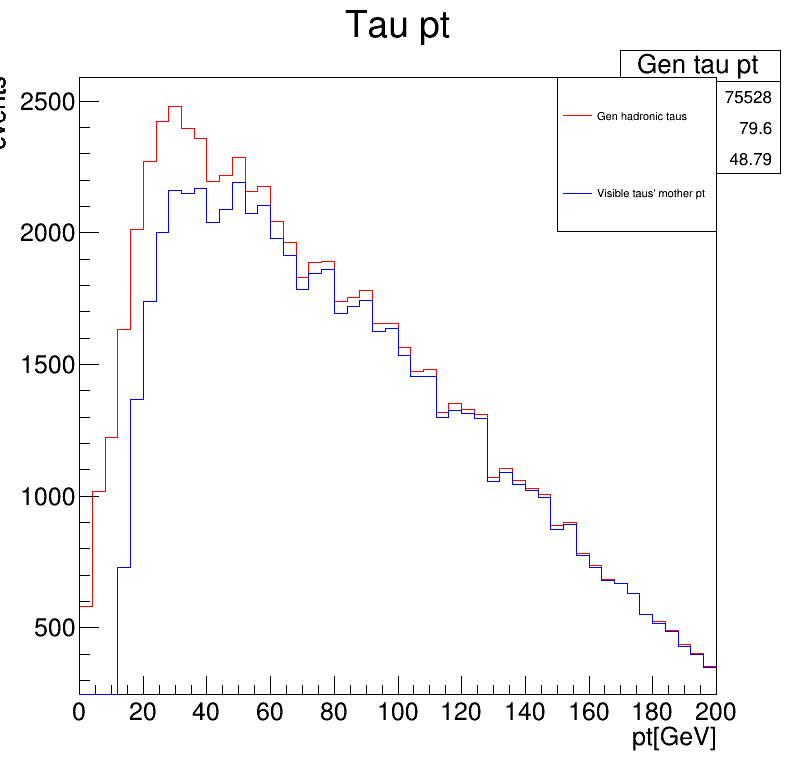

In [12]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = gentau_hadronic_pt.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h2, "Gen hadronic taus")
leg.AddEntry(h1, "Visible taus' mother pt")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")
leg.Draw()
c.Draw()

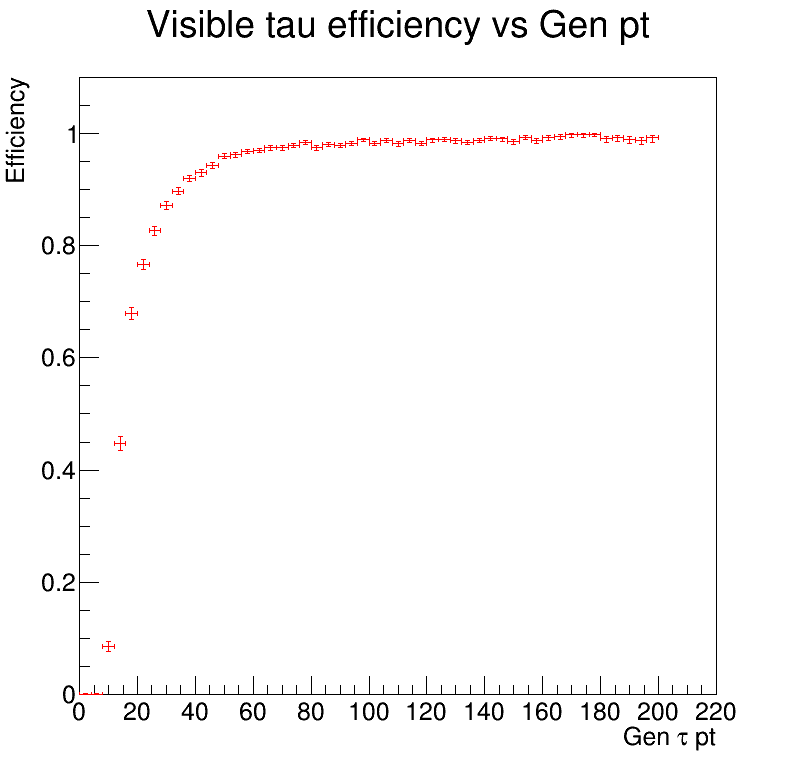

In [13]:
c = ROOT.TCanvas("", "", 800, 800)
#h1 = efficient_gen_pts.Clone()
#h2 = gentau_pt.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Visible tau efficiency vs Gen pt; Gen #tau pt; Efficiency")



eff.Draw()
#leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

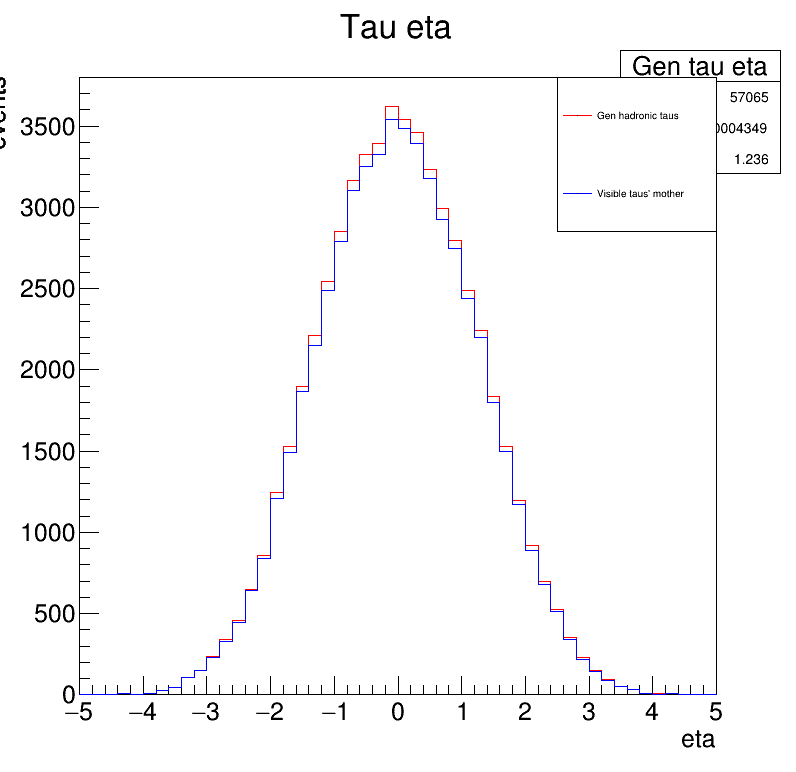

In [21]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_etas.Clone()
h2 = gentau_hadronic_eta.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h2, "Gen hadronic taus")
leg.AddEntry(h1, "Visible taus' mother")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")
leg.Draw()
c.Draw()

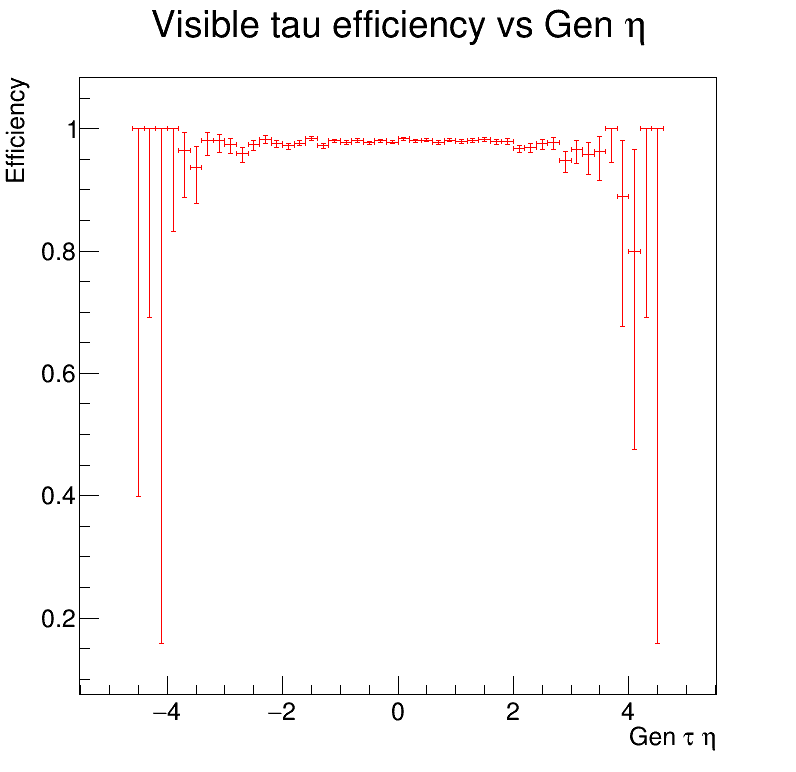

In [22]:
c = ROOT.TCanvas("", "", 800, 800)
#h1 = efficient_gen_pts.Clone()
#h2 = gentau_pt.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Visible tau efficiency vs Gen #eta; Gen #tau #eta; Efficiency")



eff.Draw()
#leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [24]:
# trigger objects
hmodel = ("TrigObjId","Trig Obj Id; id; Events", 20, 0, 20)
seedid = df.Histo1D(hmodel, "TrigObj_id")

# trigger objects
hmodel = ("Tau pt","Tau pt; pt[GeV]; Events / 4 GeV", 50, 0, 200)
ObjTauPt = df.Define("ObjTauPt", "TrigObj_pt[TrigObj_id == 15]").Histo1D(hmodel, "ObjTauPt")
ObjTauPt_L1 = df.Define("ObjTauPt_L1", "TrigObj_l1pt[TrigObj_id == 15]").Histo1D(hmodel, "ObjTauPt_L1")
RecoTau = df.Histo1D(hmodel, "Tau_pt")

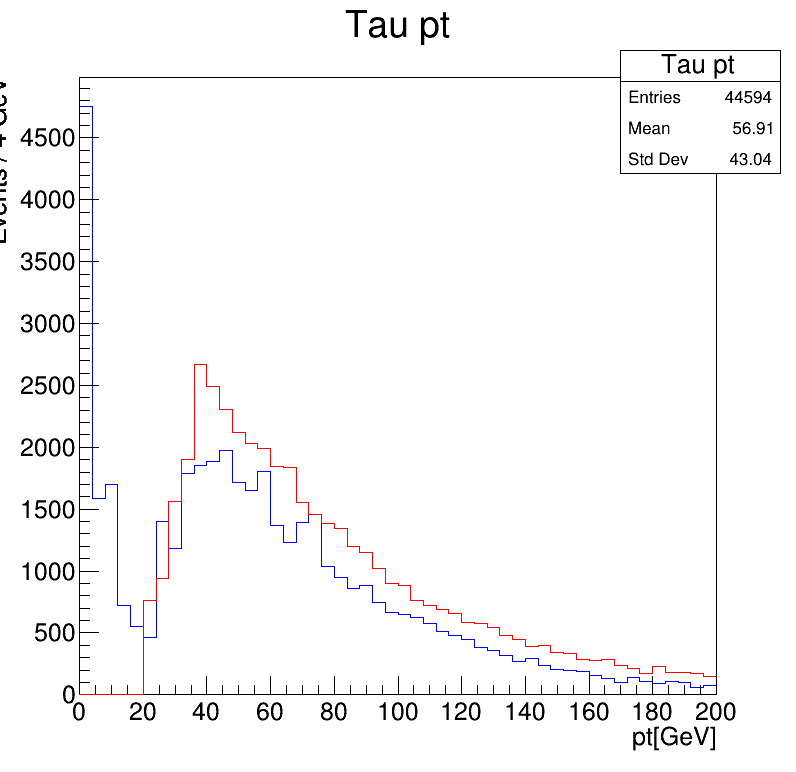

In [25]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = ObjTauPt.Clone()
h2 = ObjTauPt_L1.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

h2.Draw("")
h1.Draw("same")


c.Draw()

In [18]:
hmodel = ("deltaR(L1Tau,RecoTau)","deltaR(L1Tau,RecoTau); deltaR; Events", 100, 0, 5.)
deltaRTau = df.Define("deltaRTau", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, TrigObj_pt[TrigObj_id == 15], TrigObj_eta[TrigObj_id == 15], TrigObj_phi[TrigObj_id == 15], TrigObj_pt[TrigObj_id == 15])").Histo1D(hmodel, "deltaRTau")
deltaRL1JetTau = df.Define("deltaRL1JetTau", "deltaRGenReco(TrigObj_pt[TrigObj_id == 1], TrigObj_eta[TrigObj_id == 1], TrigObj_phi[TrigObj_id == 1], TrigObj_pt[TrigObj_id == 1], TrigObj_pt[TrigObj_id == 15], TrigObj_eta[TrigObj_id == 15], TrigObj_phi[TrigObj_id == 15], TrigObj_pt[TrigObj_id == 15])").Histo1D(hmodel, "deltaRL1JetTau")


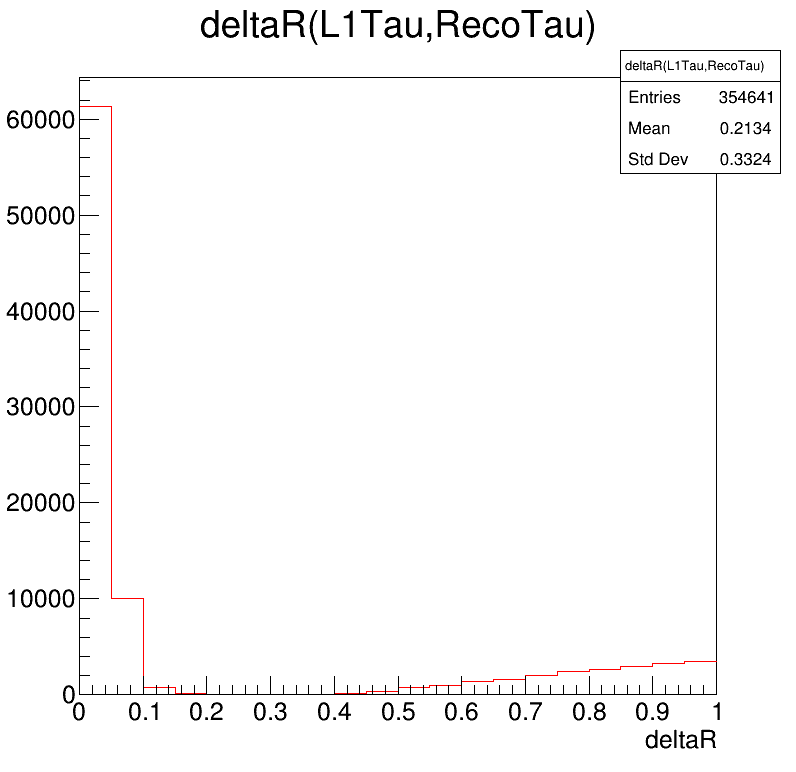

In [20]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltaRL1JetTau.Clone()
h1.GetXaxis().SetRangeUser(0, 1)
h1.SetLineColor(ROOT.kRed)


h1.Draw()

c.Draw()

In [38]:
hmodel = ("nTau","nTau; nTau; Events", 5, 0, 5.)
nL1Tau = df.Define("nL1Tau", "nGen(TrigObj_id, 15)").Histo1D(hmodel, "nL1Tau")
nTau = df.Histo1D(hmodel, "nTau")

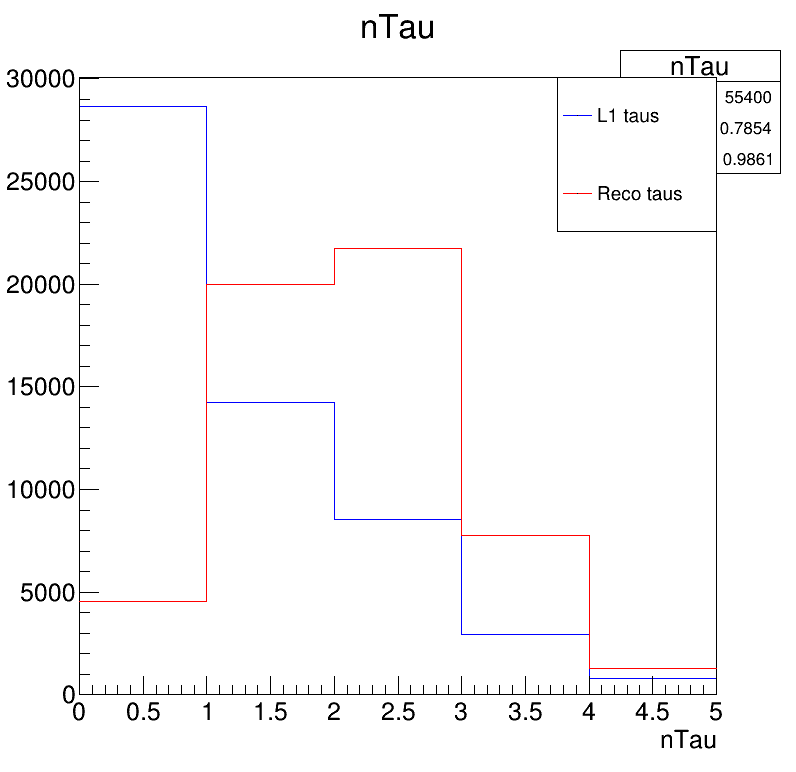

In [40]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = nTau.Clone()
h2 = nL1Tau.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h2, "L1 taus")
leg.AddEntry(h1, "Reco taus")

h2.Draw("")
h1.Draw("same")
leg.Draw()

c.Draw()

In [16]:
hmodel = ("iso","iso; iso; Events", 10, -5., 5.)
#df_ditau = df.Define("nL1Tau", "nGen(TrigObj_id, 15)").Filter("nL1Tau >= 2")
#df_bis = df.Define("DoubleIsoTau32er2p1","Sum(TrigObj_pt[TrigObj_id == 15 && abs(TrigObj_eta)<=2.1 && TrigObj_l1iso == 1]) == 2")
#df_filter = df.Filter("TrigObj_pt[TrigObj_id == 15].size() == 2")
#f_filter3 = df.Filter("Sum(TrigObj_pt[TrigObj_id == 15]) >= 2")
#f_l1 = df.Define("L1Tau_pt", "TrigObj_pt[TrigObj_id == 15]")

#num2 = df.Define("num2", "TrigObj_pt.size()").Histo1D(hmodel, "num2")
#df_filter = df_filter.Filter("TrigObj_pt[TrigObj_id == 15 && abs(TrigObj_eta)<=2.1].size() == 2")
df_filter1 = df.Filter("TrigObj_pt[TrigObj_id == 15].size() >= 2", "Tau")
df_filter2 = df_filter1.Filter("TrigObj_pt[TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1].size() >= 2", "Eta cut")
df_filter3 = df_filter2.Filter("TrigObj_pt[TrigObj_id == 15 && abs(TrigObj_eta)<=2.1 && TrigObj_l1iso == 1].size() >= 2", "Isolation")
df_filter  = df_filter3.Filter("TrigObj_pt[TrigObj_id == 15 && abs(TrigObj_eta)<=2.1 && TrigObj_l1iso == 1 && TrigObj_pt >= 32].size() >= 2", "pt")

#df_filter  = df_filter2.Define("DoubleIsoTau32er2p1", "TrigObj_pt[TrigObj_id == 15 && abs(TrigObj_eta)<=2.1 && TrigObj_l1iso == 1].size() == 2")



#h = df_bis.Histo1D(hmodel, "DoubleIsoTau")

In [25]:
#print df.Count().GetValue()
print df_filter.Report().Print()
#print df_filter.Report().GetValue()


#print df_ditau.Count().GetValue()
#print df_bis.Count().GetValue()

None
          : pass=12519      all=55400      -- eff=22.60 % cumulative eff=22.60 %
Eta cut   : pass=12249      all=12519      -- eff=97.84 % cumulative eff=22.11 %
Isolation : pass=9122       all=12249      -- eff=74.47 % cumulative eff=16.47 %
pt        : pass=6111       all=9122       -- eff=66.99 % cumulative eff=11.03 %


In [40]:
hmodel = ("iso","iso; iso; Events", 10, -5., 5.)
iso = df.Define("tauiso", "TrigObj_l1iso[TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1 && TrigObj_l1iso == 1].size()").Histo1D(hmodel, "tauiso")
hmodel = ("n","n; n; Events", 5, 0., 5.)
nTauTrigs = df.Define("nTauTrigs", "TrigObj_id[TrigObj_id == 15].size()").Histo1D(hmodel, "nTauTrigs")
hmodel = ("trigid","trigid; trigid; Events", 20, 0., 20.)
TrigIds = df.Histo1D(hmodel, "TrigObj_id")

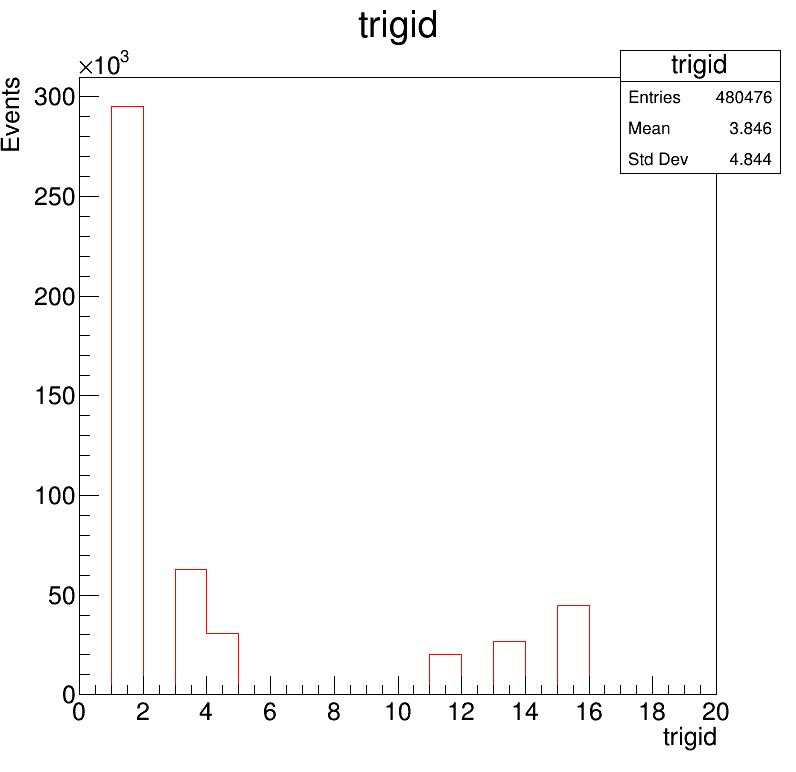

In [41]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = TrigIds.Clone()

h1.SetLineColor(ROOT.kRed)

h1.Draw()

c.Draw()

In [8]:
branchList = ROOT.vector('string')()
for branchName in ["DoubleIsoTau32er2p1"]:
    branchList.push_back(branchName)
df_filter.Snapshot("Events", "iso_skim.root", branchList)

<ROOT.ROOT::RDF::RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x987a700>

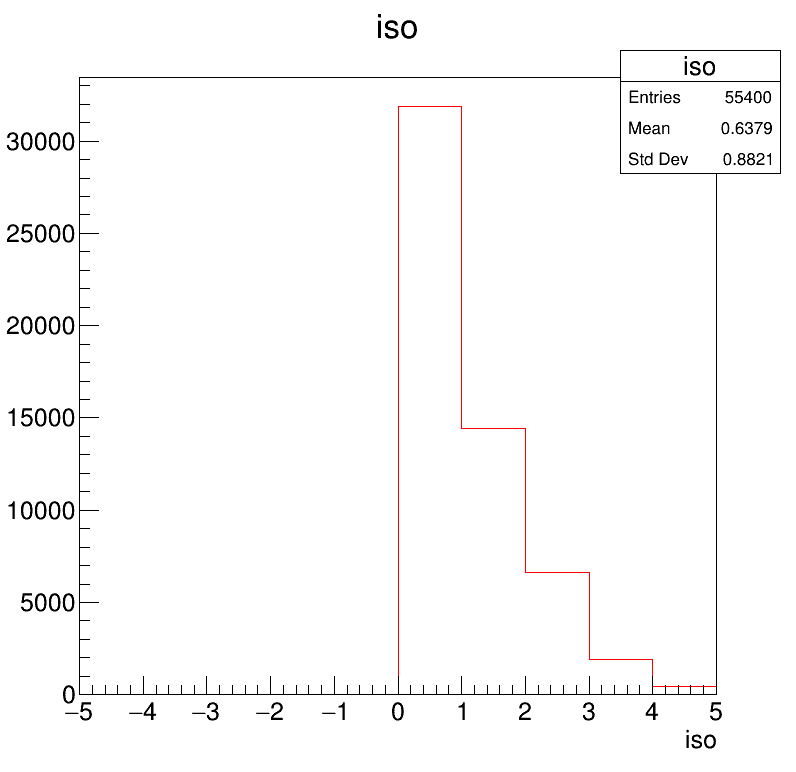

In [24]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = iso.Clone()

h1.SetLineColor(ROOT.kRed)

h1.Draw()

c.Draw()

In [ ]:
#hmodel = ("TrigJetpt","TrigJetPt; pt[GeV]; Events / 4 GeV", 50, 0., 200.)
#TrigJetPt = df.Define("TrigJetPt", "TrigObj_pt[TrigObj_id == 1]").Histo1D(hmodel, "TrigJetPt")
hmodel = ("n","n; n; Events", 10, 0., 10.)
nTrigJetPt = df.Define("nTrigJetPt", "TrigObj_pt[TrigObj_id == 1 && TrigObj_pt >= 30].size()").Histo1D(hmodel, "nTrigJetPt")
#nTrigJetPt100 = df.Define("nTrigJetPt100", "TrigObj_pt[TrigObj_id == 1 && TrigObj_pt >= 100].size()").Histo1D(hmodel, "nTrigJetPt100")

In [23]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<bool> maskDeltaR(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float th_dr) {
        ROOT::RVec<bool> mask;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            bool bigger_deltar = true;
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                float this_deltar = fabs(v1.DeltaR(v2));
                if (abs(this_deltar) < th_dr) bigger_deltar = false;
            }
            mask.push_back(bigger_deltar);
        }
        return mask;
    }
""")

True

In [13]:
nTrigJetPtMasked = df.Define("nTrigJetPtMasked", 
                             "TrigObj_pt[TrigObj_id == 1 && TrigObj_pt >= 30 && "
                                 "maskDeltaR("
                                     "TrigObj_pt, "
                                     "TrigObj_eta, "
                                     "TrigObj_phi, "
                                     "TrigObj_pt, " # dum, not needed for deltaR, just for LV
                                     "TrigObj_pt [TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1 && TrigObj_l1iso == 1], "
                                     "TrigObj_eta[TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1 && TrigObj_l1iso == 1], "
                                     "TrigObj_phi[TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1 && TrigObj_l1iso == 1], "
                                     "TrigObj_pt [TrigObj_id == 15 &&  abs(TrigObj_eta) <= 2.1 && TrigObj_l1iso == 1], " # dum
                                     "0.5)"
                                  "].size()"
                      ).Histo1D(hmodel, "nTrigJetPtMasked")

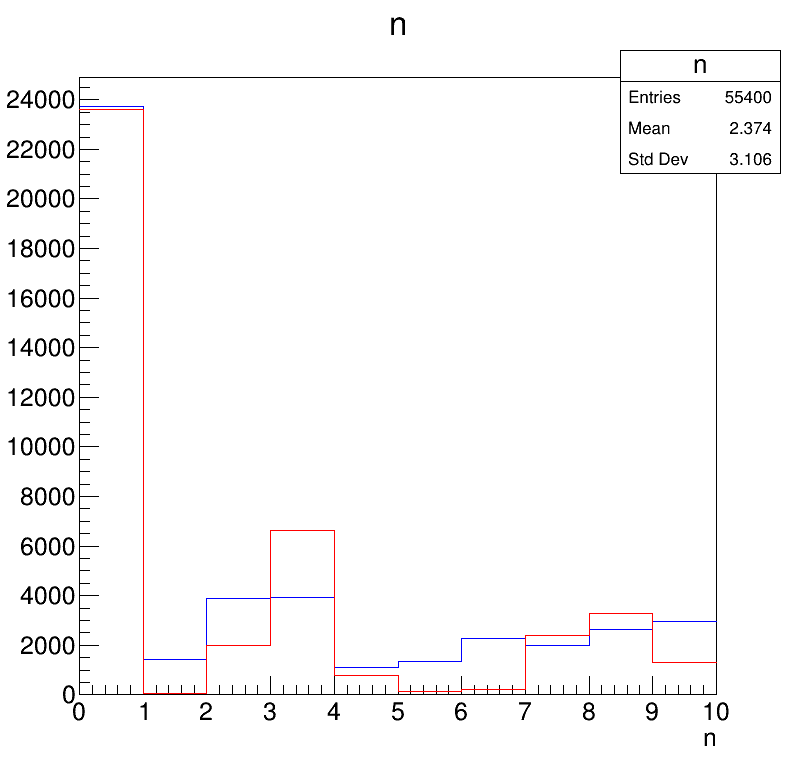

In [14]:
c = ROOT.TCanvas("", "", 800, 800)
h2 = nTrigJetPtMasked.Clone()
h1 = nTrigJetPt.Clone()

h2.SetLineColor(ROOT.kBlue)
h1.SetLineColor(ROOT.kRed)

h2.Draw()
h1.Draw("same")

c.Draw()

In [13]:
hmodel = ("n","n; n; Events", 10, 0., 10.)
trigg1 = df.Histo1D(hmodel, "HLT_DoubleTightChargedIsoPFTauHPS35_Trk1_eta2p1_Reg")
trigg2 = df.Histo1D(hmodel, "HLT_DoubleTightChargedIsoPFTauHPS40_Trk1_eta2p1_Reg")

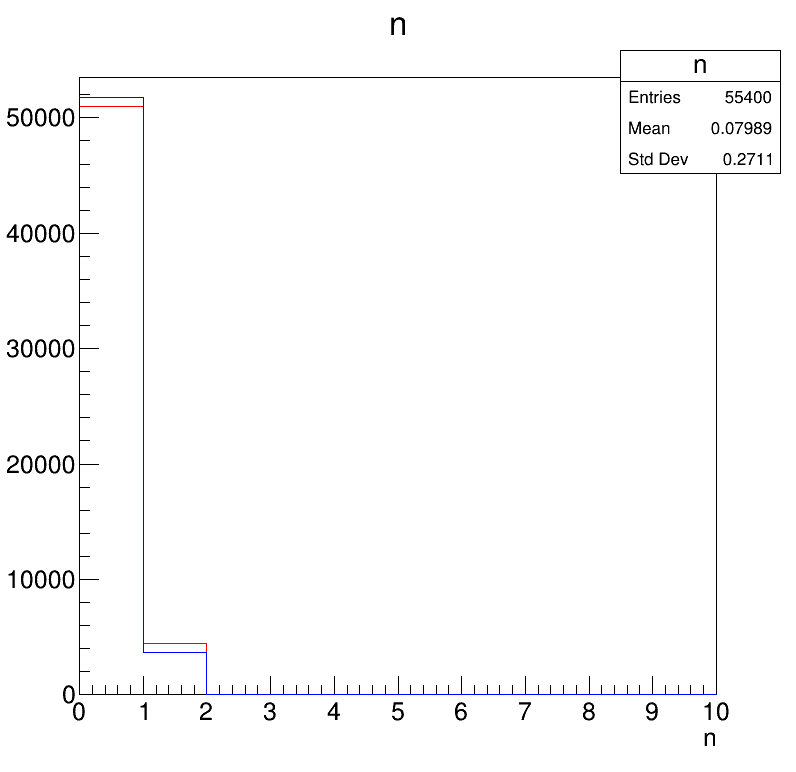

In [14]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = trigg1.Clone()
h2 = trigg2.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

h1.Draw()
h2.Draw("same")

c.Draw()

In [7]:
df_2genvis = df.Filter("nGenVisTau >= 2", ">=2 Gen")
df_2geneta = df_2genvis.Define("GoodEtaVisTau", "GenVisTau_pt[abs(GenVisTau_eta) <= 2.1]").Filter("GoodEtaVisTau.size() >= 2", ">=2 Gen Eta")
df_2recotaus = df_2geneta.Filter("nTau >= 2", ">=2 Reco")
df_2recoeta = df_2recotaus.Define("GoodEtaRecoTau", "Tau_pt[abs(Tau_eta) <= 2.1]").Filter("GoodEtaRecoTau.size() >= 2", ">=2 Reco Eta")


df_2genvis_pt = df_2recoeta.Define("Pt40VisTau", "GenVisTau_pt[GenVisTau_pt >= 40]").Filter("Pt40VisTau.size() >= 2", ">=2 GenPt>=40")
df_2recotaus_pt = df_2genvis_pt.Define("Pt40RecoTau", "Tau_pt[Tau_pt >= 40]").Filter("Pt40RecoTau.size() >= 2", ">=2 RecoPt>=40")

df_tight40_trig = df_2recotaus_pt.Filter("HLT_DoubleTightChargedIsoPFTauHPS40_Trk1_eta2p1_Reg == 1", "TightTrigger 40")
df_medium40_trig = df_2recotaus_pt.Filter("HLT_DoubleMediumChargedIsoPFTauHPS40_Trk1_eta2p1_Reg == 1", "MedTrigger 40")



df_tight35_trig = df_2recotaus_pt.Filter("HLT_DoubleTightChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "TightTrigger 35")
df_medium35_trig = df_2recotaus_pt.Filter("HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "MedTrigger 35")


nTauTrigs = df_trig.Define("nTauTrigsAfterTrig", "TrigObj_id[TrigObj_id == 15].size()").Histo1D(hmodel, "nTauTrigsAfterTrig")


NameError: name 'df_trig' is not defined

In [15]:
df_2recotaus = df.Filter("nTau >= 2", ">=2 Reco")
df_2recoeta = df_2recotaus.Define("GoodEtaRecoTau", "Tau_pt[abs(Tau_eta) <= 2.1]").Filter("GoodEtaRecoTau.size() >= 2", ">=2 Reco Eta")
df_2vse = df_2recoeta.Define("TauPtVsE", "Tau_pt[are_wp(Tau_idDeepTau2017v2p1VSe, 2, 10)]").Filter("TauPtVsE.size() >= 2", ">=2 VVLoosevsE")
df_2vsmu = df_2vse.Define("TauPtVsMu", "Tau_pt[are_wp(Tau_idDeepTau2017v2p1VSmu, 1, 10)]").Filter("TauPtVsMu.size() >= 2", ">=2 VLoosevsMu")
df_2vsjet = df_2vsmu.Define("TauPtVsJet", "Tau_pt[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)]").Filter("TauPtVsJet.size() >= 2", ">=2 MediumvsJet")
df_2recotaus_pt = df_2vsjet.Define("Pt40RecoTau", "Tau_pt[Tau_pt >= 40]").Filter("Pt40RecoTau.size() >= 2", ">=2 RecoPt>=40")
df_2recotaus_pt35 = df_2vsjet.Define("Pt35RecoTau", "Tau_pt[Tau_pt >= 35]").Filter("Pt35RecoTau.size() >= 2", ">=2 RecoPt>=35")
df_2recotaus_pt30 = df_2vsjet.Define("Pt30RecoTau", "Tau_pt[Tau_pt >= 30]").Filter("Pt30RecoTau.size() >= 2", ">=2 RecoPt>=30")

df_2recotaus_pt60 = df_2vsjet.Define("Pt60RecoTau", "Tau_pt[Tau_pt >= 60]").Filter("Pt60RecoTau.size() >= 2", ">=2 RecoPt>=60")
df_medium35_trig60 = df_2recotaus_pt60.Filter("HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "MedTrigger 35")

df_2recotaus_pt100 = df_2vsjet.Define("Pt100RecoTau", "Tau_pt[Tau_pt >= 100]").Filter("Pt100RecoTau.size() >= 2", ">=2 RecoPt>=100")
df_medium35_trig100 = df_2recotaus_pt100.Filter("HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "MedTrigger 35")

df_medium35_trig = df_2recotaus_pt.Filter("HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "MedTrigger 35")
df_l132 = df_2recotaus_pt.Filter("L1_DoubleIsoTau32er2p1", "L1 DoubIsoTau32")
df_l132_60 = df_2recotaus_pt60.Filter("L1_DoubleIsoTau32er2p1", "L1 DoubIsoTau32")
df_l132_100 = df_2recotaus_pt100.Filter("L1_DoubleIsoTau32er2p1", "L1 DoubIsoTau32")


df_medium35_trig_nopt = df_2vsjet.Filter("HLT_DoubleMediumChargedIsoPFTauHPS35_Trk1_eta2p1_Reg == 1", "MedTrigger 35")

In [18]:
hmodel = ("TauPt","Tau pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
pt = df_2vsjet.Histo1D(hmodel, "Tau_pt")


pt_masked = df_2vsjet.Define("TauGenVisMatchPt", 
                             "efficient_feat( "
                                     "Tau_pt, "
                                     "Tau_pt, "
                                     "Tau_eta, "
                                     "Tau_phi, "
                                     "Tau_mass, "
                                     "GenVisTau_pt, "
                                     "GenVisTau_eta, "
                                     "GenVisTau_phi, "
                                     "GenVisTau_mass, "
                                     "0.5)"
                      ).Histo1D(hmodel, "TauGenVisMatchPt")


mask = ("maskDeltaR( "
            "Tau_pt, "
            "Tau_eta, "
            "Tau_phi, "
            "Tau_mass, "
            "GenVisTau_pt, "
            "GenVisTau_eta, "
            "GenVisTau_phi, "
            "GenVisTau_mass, "
            "0.5)"
       )

pt_notmasked = df_2vsjet.Define("TauNotGenVisMatchPt", "Tau_pt[{}]".format(mask)).Histo1D(hmodel, "TauNotGenVisMatchPt")



pt_notmasked_maskedjets = df_2vsjet.Define("TauNotGenVisMatchMatchJetsPt",
                                           "efficient_feat( "
                                                 "Tau_pt[{0}], "
                                                 "Tau_pt[{0}], "
                                                 "Tau_eta[{0}], "
                                                 "Tau_phi[{0}], "
                                                 "Tau_mass[{0}], "
                                                 "GenJet_pt, "
                                                 "GenJet_eta, "
                                                 "GenJet_phi, "
                                                 "GenJet_mass, "
                                                 "0.5)".format(mask)
                      ).Histo1D(hmodel, "TauNotGenVisMatchMatchJetsPt")

hmodel = ("JetFlavour","JetFlavour; Jet Flavour; Events ", 20, 0., 20.)
jetflavor_notmasked_maskedjets = df_2vsjet.Define("MatchedJetFlavor",
                                           "efficient_feat( "
                                                 "GenJet_hadronFlavour, "
                                                 "GenJet_pt, "
                                                 "GenJet_eta, "
                                                 "GenJet_phi, "
                                                 "GenJet_mass, "
                                                 "Tau_pt[{0}], "
                                                 "Tau_eta[{0}], "
                                                 "Tau_phi[{0}], "
                                                 "Tau_mass[{0}], "
                                                 "0.5)".format(mask)
                      ).Histo1D(hmodel, "MatchedJetFlavor")



genvispt = df_2vsjet.Histo1D(hmodel, "GenVisTau_pt")
pt_trig = df_medium35_trig_nopt.Histo1D(hmodel, "Tau_pt")
genvispt_trig = df_medium35_trig_nopt.Histo1D(hmodel, "GenVisTau_pt")
#leading_pt = df_2vsjet.Define("Leading pt", "Max(Tau_pt)").Histo1D(hmodel, "Leading_pt")

In [64]:
df_medium35_trig_nopt.Report().Print()

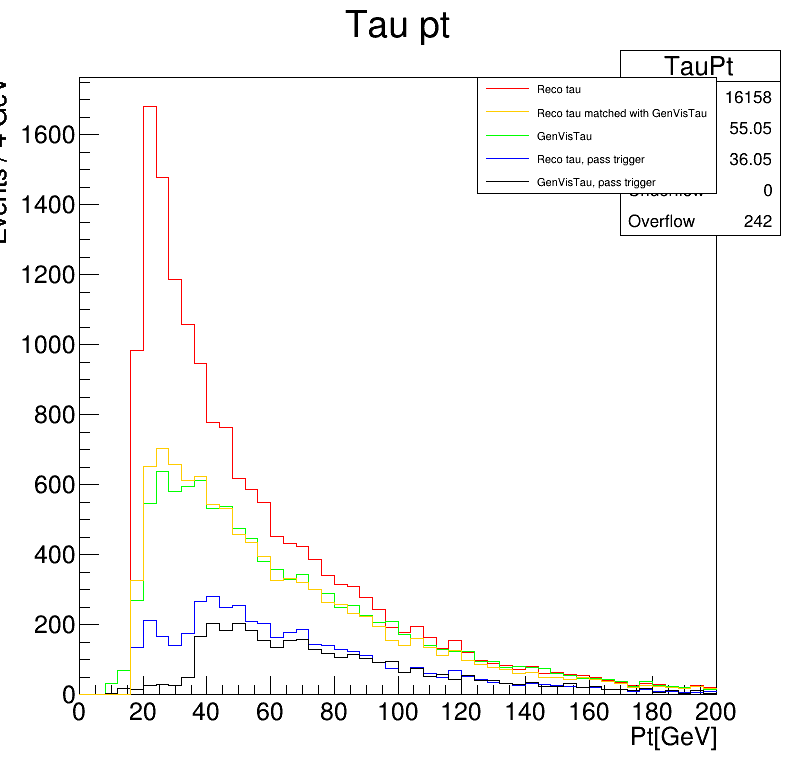

In [17]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = pt.Clone()
h5 = pt_masked.Clone()
h2 = pt_trig.Clone()
h3 = genvispt.Clone()
h4 = genvispt_trig.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kBlack)
h5.SetLineColor(ROOT.kOrange)


h1.Draw()
h2.Draw("same")
h3.Draw("same")
h4.Draw("same")
h5.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h5, "Reco tau matched with GenVisTau", "l")
leg.AddEntry(h3, "GenVisTau", "l")
leg.AddEntry(h2, "Reco tau, pass trigger", "l")
leg.AddEntry(h4, "GenVisTau, pass trigger", "l")

leg.Draw("same")

c.Draw()

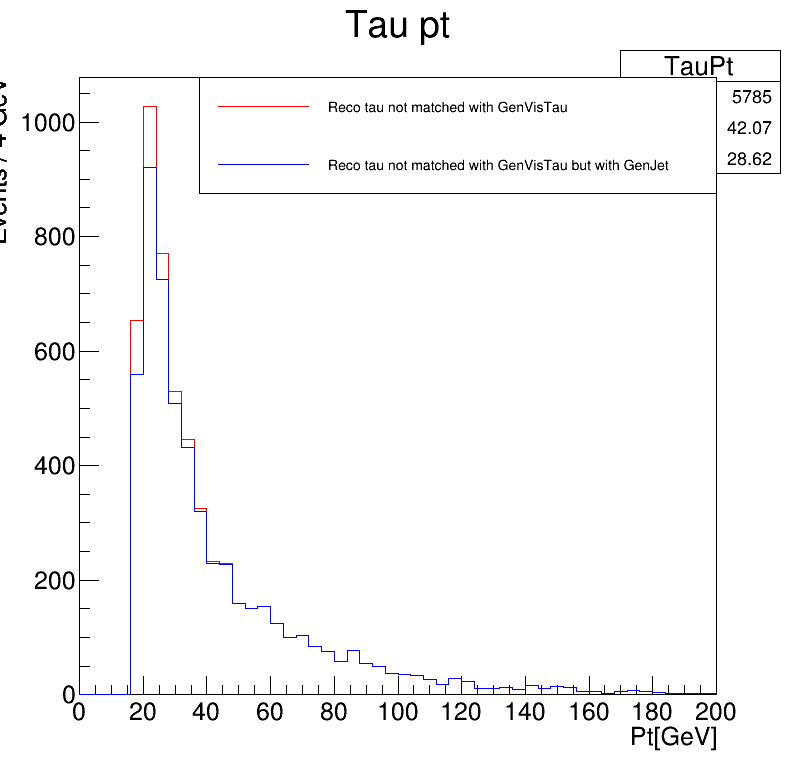

In [17]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = pt_notmasked.Clone()
h2 = pt_notmasked_maskedjets.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)


h1.Draw()
h2.Draw("same")


leg = ROOT.TLegend(0.25, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau not matched with GenVisTau", "l")
leg.AddEntry(h2, "Reco tau not matched with GenVisTau but with GenJet", "l")
leg.SetTextSize(0.02);
leg.Draw("same")

c.Draw()

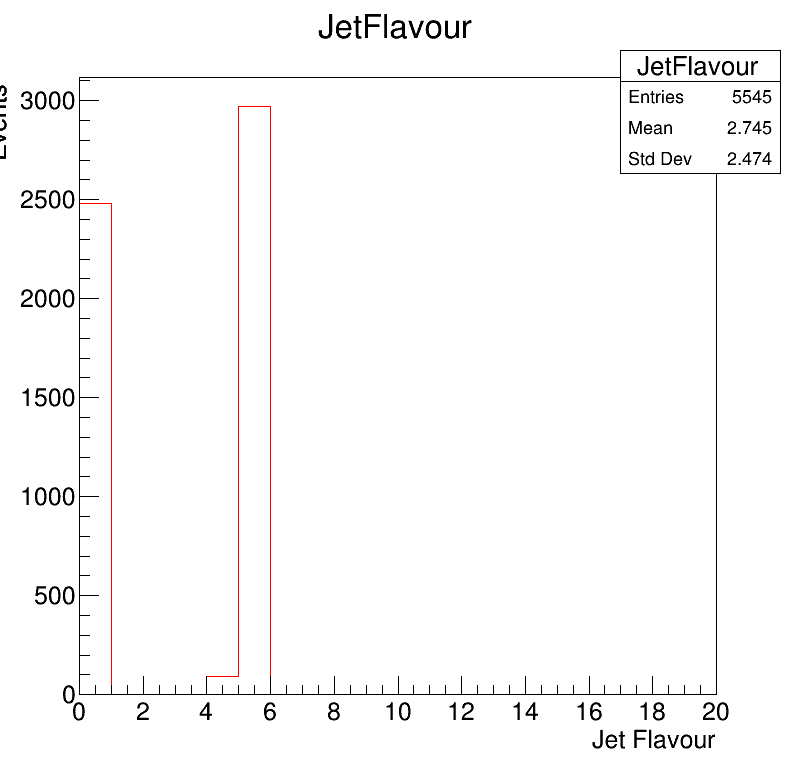

In [21]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = jetflavor_notmasked_maskedjets.Clone()
#h2 = leading_pt_trig.Clone()

h1.SetLineColor(ROOT.kRed)
#h2.SetLineColor(ROOT.kBlue)



h1.Draw()
#h2.Draw("same")



#leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
#leg.AddEntry(h1, "Reco tau", "l")
#leg.AddEntry(h2, "Reco tau, pass trigger", "l")

#leg.Draw("same")


c.Draw()

In [47]:
hmodel = ("nTau","nTau; n; Events ", 5, 0., 5.)
ntau = df_2vsjet.Define("ntau", "Tau_pt.size()").Histo1D(hmodel, "ntau")
ngenvispt = df_2vsjet.Define("ngenvistau", "GenVisTau_pt.size()").Histo1D(hmodel, "ngenvistau")
ntau_trig = df_medium35_trig_nopt.Define("ntau", "Tau_pt.size()").Histo1D(hmodel, "ntau")
ngenvispt_trig = df_medium35_trig_nopt.Define("ngenvistau", "GenVisTau_pt.size()").Histo1D(hmodel, "nGenVisTau")
#leading_pt = df_2vsjet.Define("Leading pt", "Max(Tau_pt)").Histo1D(hmodel, "Leading_pt")

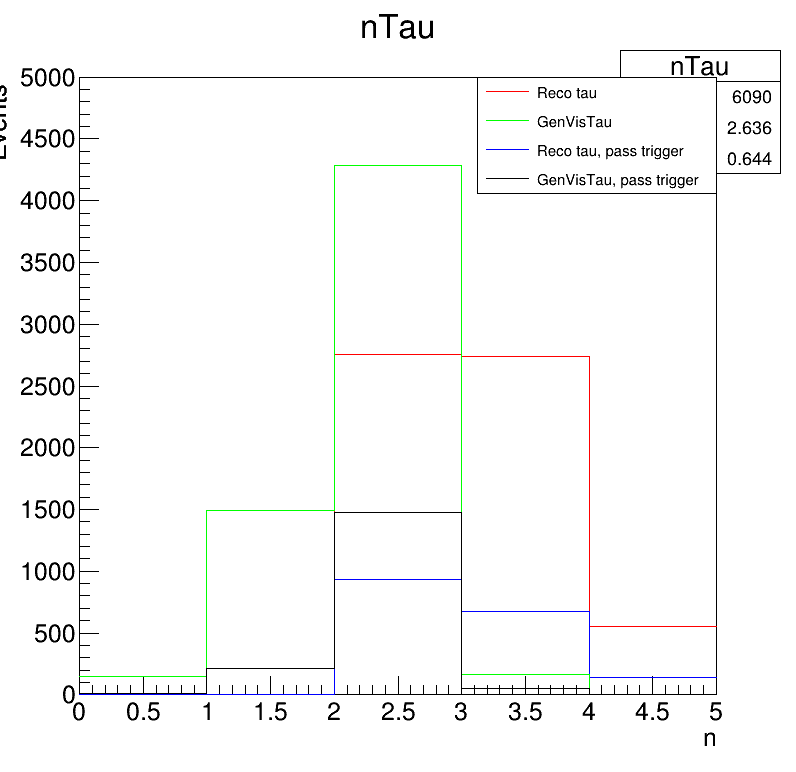

In [49]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = ntau.Clone()
h2 = ntau_trig.Clone()
h3 = ngenvispt.Clone()
h4 = ngenvispt_trig.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kBlack)

h1.GetYaxis().SetRangeUser(0, 5000)

h1.Draw()
h2.Draw("same")
h3.Draw("same")
h4.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h3, "GenVisTau", "l")
leg.AddEntry(h2, "Reco tau, pass trigger", "l")
leg.AddEntry(h4, "GenVisTau, pass trigger", "l")

leg.Draw("same")

c.Draw()

In [5]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> lead_sublead_pt(Vfloat pt){
        ROOT::RVec<float> leading_pts;
        leading_pts.push_back(-1.);
        leading_pts.push_back(-1.);
        for (size_t i = 0; i < pt.size(); i++) {
            if (pt[i] > leading_pts[0]) {
                leading_pts[1] = leading_pts[0];
                leading_pts[0] = pt[i];
            } 
            else if (pt[i] > leading_pts[1])
                leading_pts[1] = pt[i];
        }
        return leading_pts;
    }
""")

True

In [9]:
hmodel = ("Leading RecoTauPt","Leading Reco Tau pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
leading_pt = df_2vsjet.Define("Leading_pt", "lead_sublead_pt(Tau_pt)[0]").Histo1D(hmodel, "Leading_pt")
leading_pt_trig = df_medium35_trig_nopt.Define("Leading_pt", "lead_sublead_pt(Tau_pt)[0]").Histo1D(hmodel, "Leading_pt")

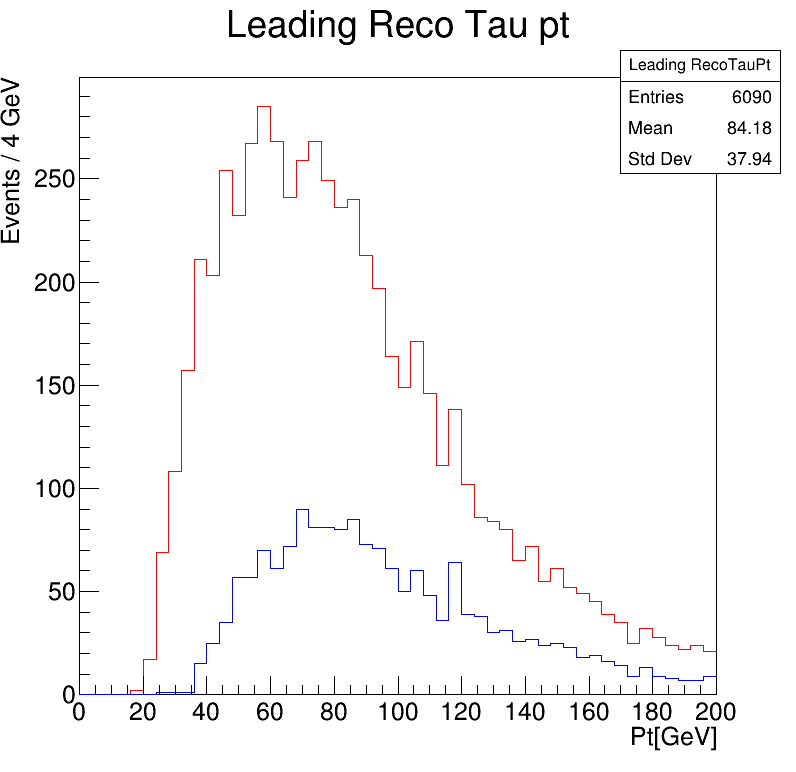

In [10]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = leading_pt.Clone()
h2 = leading_pt_trig.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)



h1.Draw()
h2.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Reco tau, pass trigger", "l")

leg.Draw("same")


c.Draw()

In [12]:
hmodel = ("Subleading RecoTauPt","Subleading Reco Tau pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
subleading_pt = df_2vsjet.Define("Subleading_pt", "lead_sublead_pt(Tau_pt)[1]").Histo1D(hmodel, "Subleading_pt")
subleading_pt_trig = df_medium35_trig_nopt.Define("Subleading_pt", "lead_sublead_pt(Tau_pt)[1]").Histo1D(hmodel, "Subleading_pt")

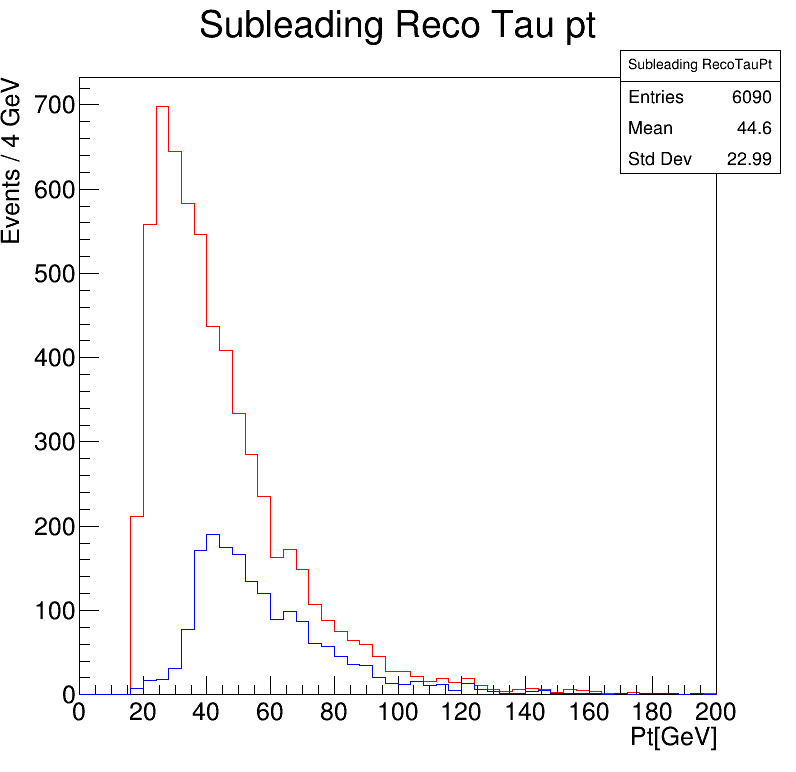

In [13]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = subleading_pt.Clone()
h2 = subleading_pt_trig.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)



h1.Draw()
h2.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Reco tau, pass trigger", "l")

leg.Draw("same")

c.Draw()

In [20]:
hmodel = ("deltaR(RecoTau)","deltaR(RecoTau);deltaR(RecoTau)]; Events", 50, 0.001, 5.)

deltaR = df_2vsjet.Define("deltaR", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "deltaR")
deltaR_trig = df_medium35_trig_nopt.Define("deltaR", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "deltaR")


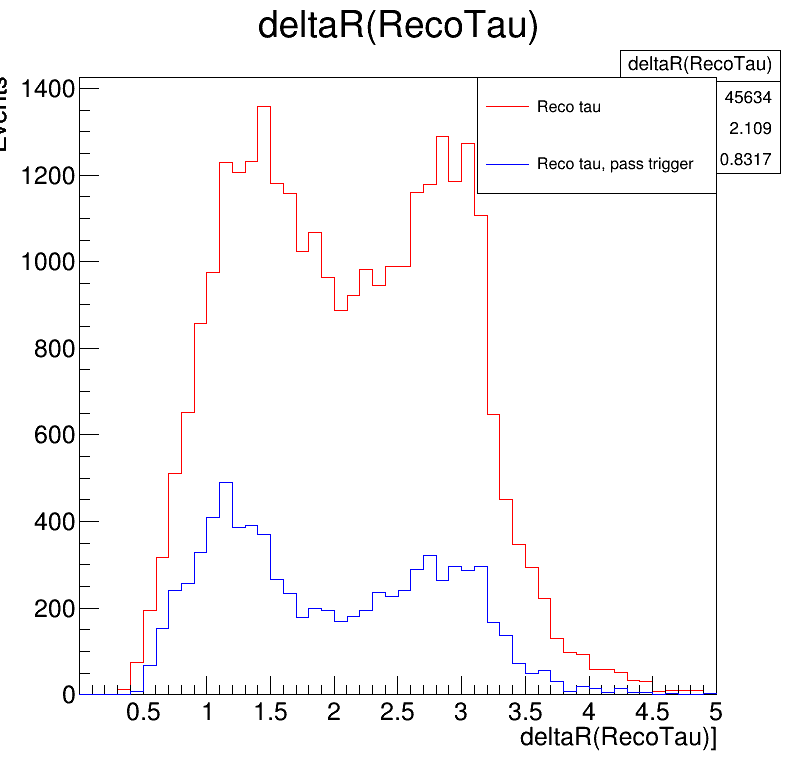

In [22]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltaR.Clone()
h2 = deltaR_trig.Clone()

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)



h1.Draw()
h2.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Reco tau, pass trigger", "l")

leg.Draw("same")

c.Draw()

In [9]:
hmodel = ("deltaR(RecoTau)","deltaR(RecoTau);deltaR(RecoTau)]; Events", 50, 0.001, 5.)

deltaRTauJet = df_2vsjet.Define("deltaRTauJet", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltaRTauJet")

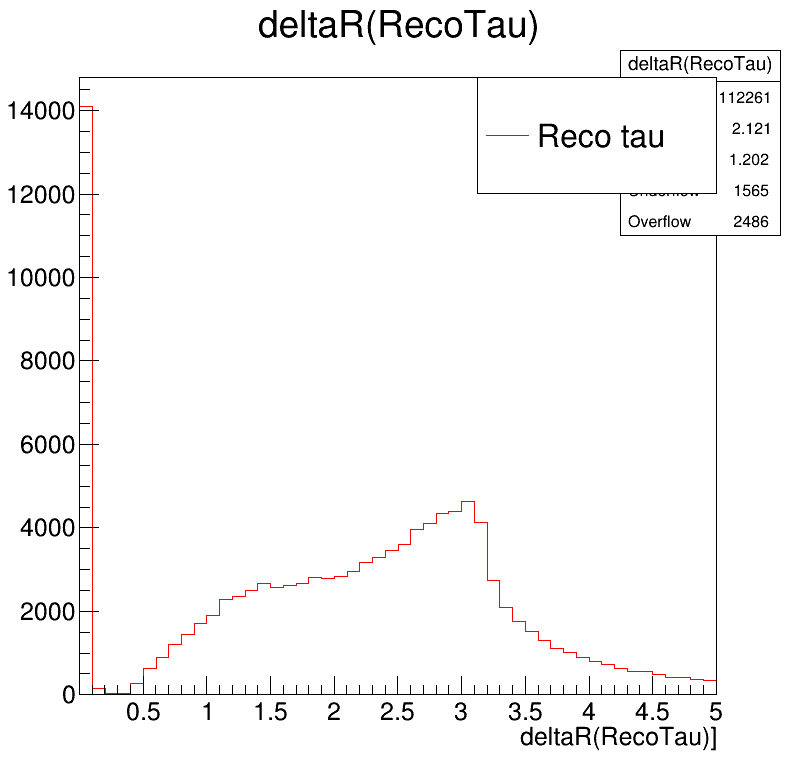

In [10]:
ROOT.gStyle.SetOptStat(111111)
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltaRTauJet.Clone()
#h2 = deltaR_trig.Clone()

h1.SetLineColor(ROOT.kRed)
#h2.SetLineColor(ROOT.kBlue)



h1.Draw()
#h2.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
#leg.AddEntry(h2, "Reco tau, pass trigger", "l")

leg.Draw("same")

c.Draw()

In [69]:
hmodel = ("n","n; n; Events", 10, 0, 10)
ngenjet = df_2vsjet.Define("ngenjet", "GenJet_pt.size()").Histo1D(hmodel, "ngenjet")


In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = ngenjet.Clone()
#h2 = deltaR_trig.Clone()

h1.SetLineColor(ROOT.kRed)
#h2.SetLineColor(ROOT.kBlue)



h1.Draw()
#h2.Draw("same")



#leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
#leg.AddEntry(h1, "Reco tau", "l")
#leg.AddEntry(h2, "Reco tau, pass trigger", "l")

#leg.Draw("same")

c.Draw()

In [32]:
test_df = ROOT.RDataFrame("Events", "/afs/cern.ch/work/j/jleonhol/private/nanoaod/CMSSW_10_2_5/src/PhysicsTools/NanoAOD/test/nano.root")

In [43]:
histo = test_df.Define("nType", "L1Obj_type[L1Obj_type == 0].size()").Histo1D("nType")

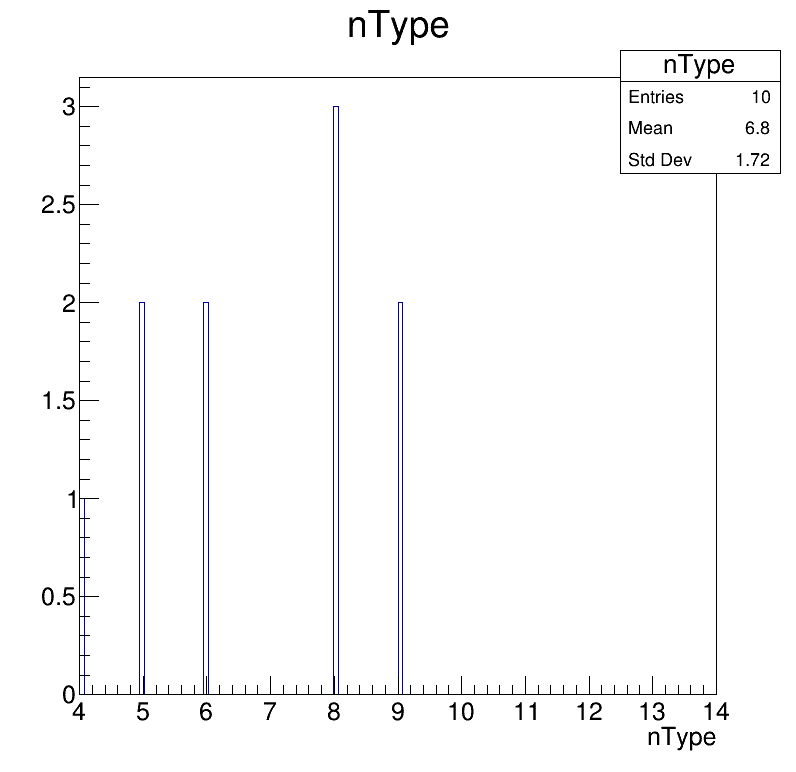

In [44]:
c = ROOT.TCanvas("", "", 800, 800)

histo.Draw()
c.Draw()

In [13]:
ggf_bis = Dataset("ggf_sm_bis",
             "/eos/user/j/jleonhol/HH/ggf_2018_nanotest2/",
             ggf_sm_process)


files = ggf_bis.get_files()
print files

dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
new_df = ROOT.RDataFrame("Events", dataframe_files)


['/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_1.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_10.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_11.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_12.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_13.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_14.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_15.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_16.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_17.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_18.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_19.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_2.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_20.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_21.root', '/eos/user/j/jleonhol/HH/ggf_2018_nanotest2//NANO_NANO_22.root', '/eos/user/j/jleonhol/HH/g

In [18]:
print [col for col in new_df.GetColumnNames() if "L1Obj".lower() in col.lower()]

SystemError: vector<string> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::GetColumnNames() =>
    problem in C++; program state has been reset

Error in <TClingCallFunc::make_wrapper>: Failed to compile
  ==== SOURCE BEGIN ====
#pragma clang diagnostic push
#pragma clang diagnostic ignored "-Wformat-security"
__attribute__((used)) extern "C" void __cf_34(void* obj, int nargs, void** args, void* ret)
{
   if (ret) {
      new (ret) (vector<string>) (((ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>*)obj)->GetColumnNames());
      return;
   }
   else {
      ((ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>*)obj)->GetColumnNames();
      return;
   }
}
#pragma clang diagnostic pop
  ==== SOURCE END ====

 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 22 (Thread 0x7fdde6ffe700 (LWP 10302)):
#0  0x00007fde48c95fd3 in epoll_wait () from /lib64/libc.so.6
#1  0x00007fde468bb64c in zmq::epoll_t::loop (this=0x7fdde00051b0) at bundled/zeromq/src/epoll.cpp:184
#2  0x00007fde468a68f9 in thread_routine (arg_=0x7fdde0005208) at bundled/zeromq/src/th

In [7]:
pt = df.Histo1D("Tau_pt")
pt_new = new_df.Histo1D("Tau_pt")

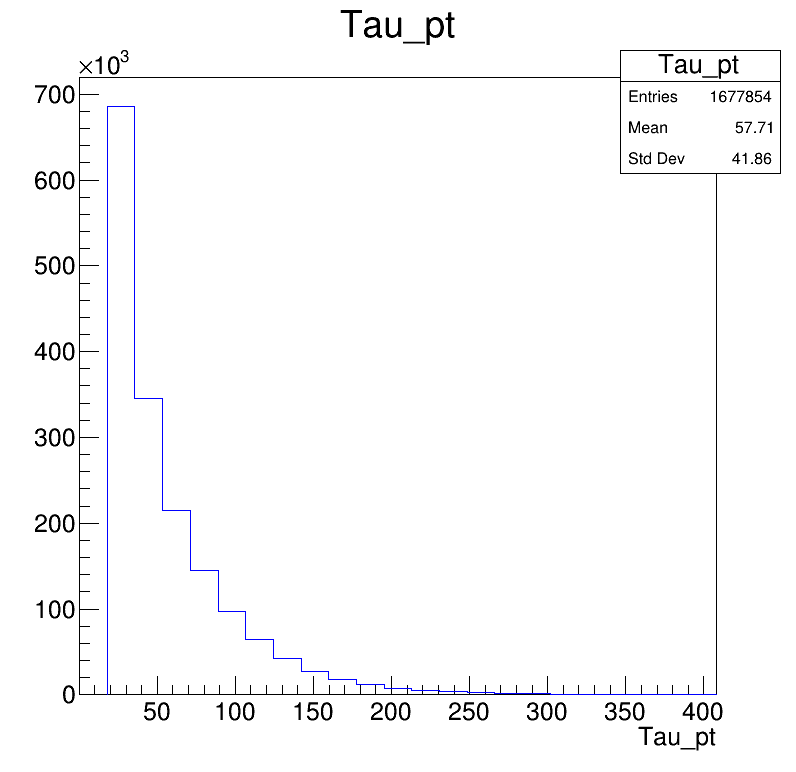

In [8]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = pt.Clone()
hnew = pt_new.Clone()

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)

h1.GetXaxis().SetRangeUser(0, 400)


h1.Draw()
hnew.Draw("same")

c.Draw()


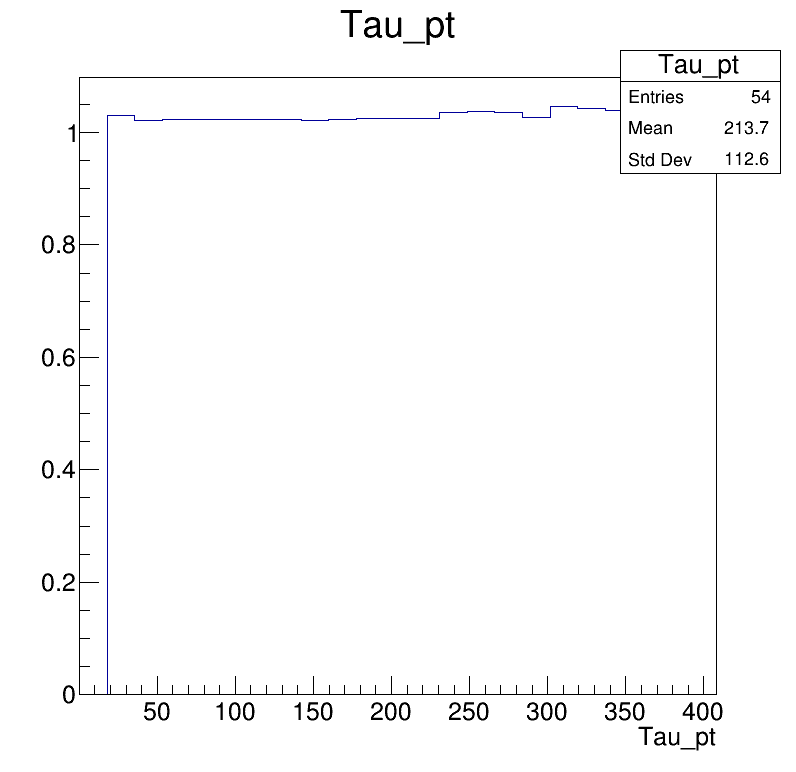

In [14]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = pt.Clone()
hnew = pt_new.Clone()

h1.Divide(hnew)

h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()

c.Draw()

In [17]:
L1Taupt = new_df.Define("L1Tau_pt", "L1Obj_pt[L1Obj_type == 1]").Histo1D("L1Tau_pt")

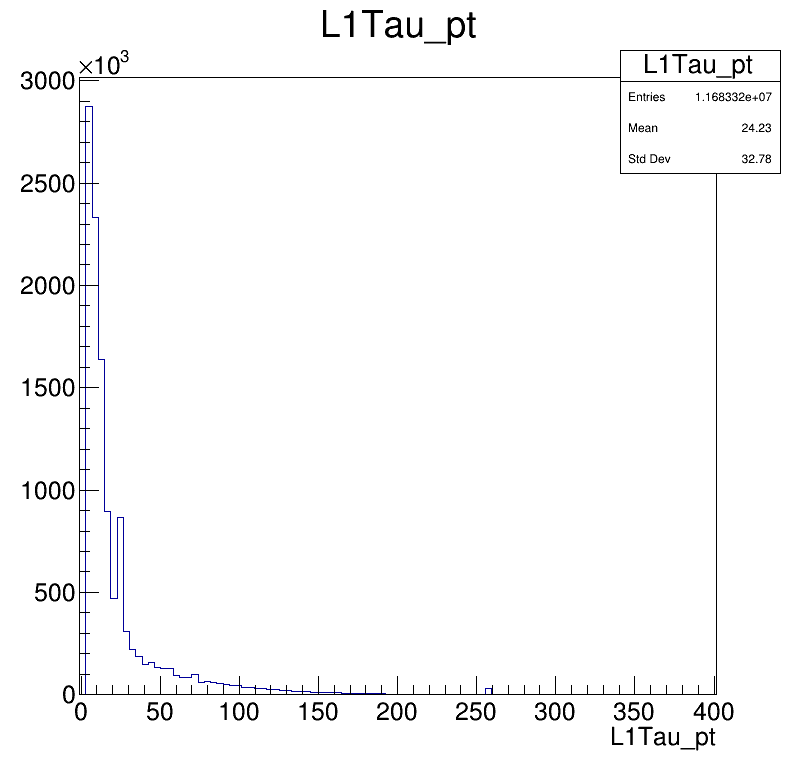

In [18]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = L1Taupt.Clone()

h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()

c.Draw()

In [20]:
DeltaRL1RecoTau = new_df.Define("DeltaRL1RecoTau",
                        "deltaRGenReco("
                            "L1Obj_pt[L1Obj_type == 1], "
                            "L1Obj_eta[L1Obj_type == 1], "
                            "L1Obj_phi[L1Obj_type == 1], "
                            "L1Obj_pt[L1Obj_type == 1], " #dum
                            "Tau_pt, "
                            "Tau_eta, "
                            "Tau_phi, "
                            "Tau_mass "                        
                        ")").Histo1D("DeltaRL1RecoTau")


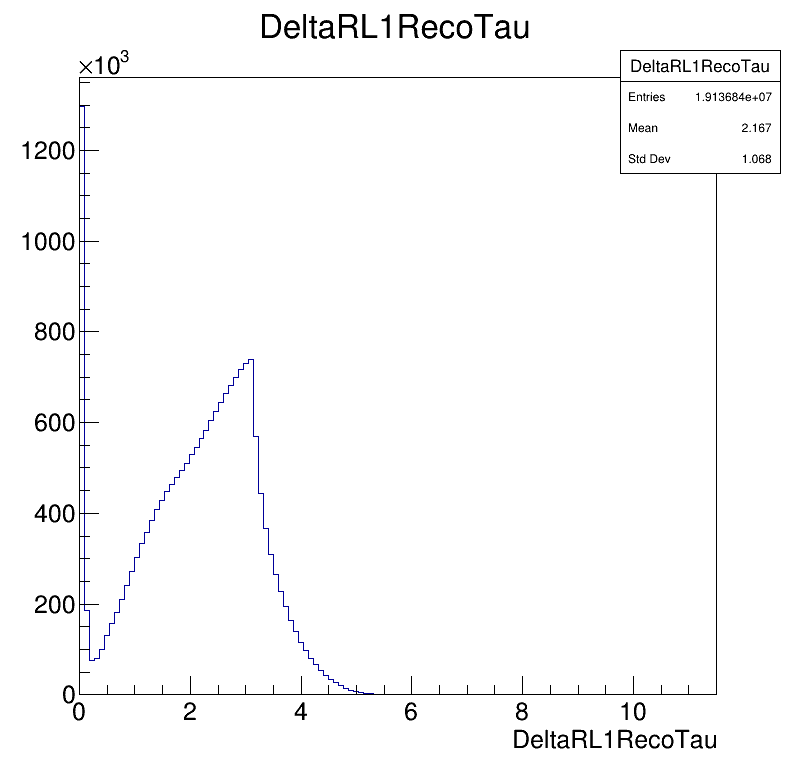

In [21]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = DeltaRL1RecoTau.Clone()

#h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()

c.Draw()

In [44]:
DeltaRL1TauL1Jet = new_df.Define("DeltaRL1TauL1Jet",
                        "deltaRGenReco("
                            "L1Obj_pt[L1Obj_type == 1], "
                            "L1Obj_eta[L1Obj_type == 1], "
                            "L1Obj_phi[L1Obj_type == 1], "
                            "L1Obj_pt[L1Obj_type == 1], " #dum
                            "L1Obj_pt[L1Obj_type == 0], "
                            "L1Obj_eta[L1Obj_type == 0], "
                            "L1Obj_phi[L1Obj_type == 0], "
                            "L1Obj_pt[L1Obj_type == 0] "                        
                        ")").Histo1D("DeltaRL1TauL1Jet")

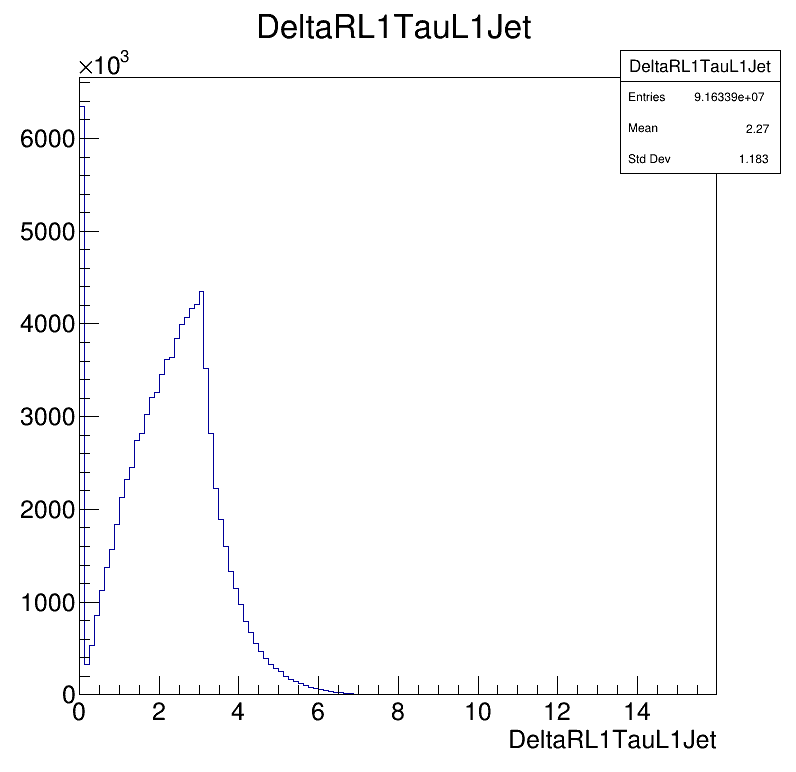

In [45]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = DeltaRL1TauL1Jet.Clone()

#h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()

c.Draw()

In [15]:
L1JetMaskedPt = new_df.Define("L1JetMaskedPt", 
                              "L1Obj_pt["
                                  "L1Obj_type == 0 && "
                                  "maskDeltaR("
                                      "L1Obj_pt, "
                                      "L1Obj_eta, "
                                      "L1Obj_phi, "
                                      "L1Obj_pt, " #dum
                                      "L1Obj_pt[L1Obj_type == 1], "
                                      "L1Obj_eta[L1Obj_type == 1], "
                                      "L1Obj_phi[L1Obj_type == 1], "
                                      "L1Obj_pt[L1Obj_type == 1], " # dum
                                      "0.5)"
                                  "]"
                             ).Histo1D("L1JetMaskedPt")

TypeError: can not resolve method template call for 'Define'

In [16]:
L1JetPt = new_df.Define("L1JetPt", "L1Obj_pt[L1Obj_type == 0]").Histo1D("L1JetPt")

TypeError: can not resolve method template call for 'Define'

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = L1JetPt.Clone()
h2 = L1JetMaskedPt.Clone()

h1.GetXaxis().SetRangeUser(0, 200)

h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

h1.Draw()
h2.Draw("same")

c.Draw()

In [58]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> minDeltaR(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> deltaR;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            float this_min_deltar = 999.;
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < this_min_deltar)
                    this_min_deltar = fabs(v1.DeltaR(v2));
            }
            deltaR.push_back(this_min_deltar);
        }
        return deltaR;
    }
""")

True

In [60]:
L1JetTauMinDeltaR = new_df.Define("L1JetTauMinDeltaR", 
                                  "minDeltaR("
                                      "L1Obj_pt, "
                                      "L1Obj_eta, "
                                      "L1Obj_phi, "
                                      "L1Obj_pt, " #dum
                                      "L1Obj_pt[L1Obj_type == 1], "
                                      "L1Obj_eta[L1Obj_type == 1], "
                                      "L1Obj_phi[L1Obj_type == 1], "
                                      "L1Obj_pt[L1Obj_type == 1])" # dum
                             ).Histo1D("L1JetTauMinDeltaR")

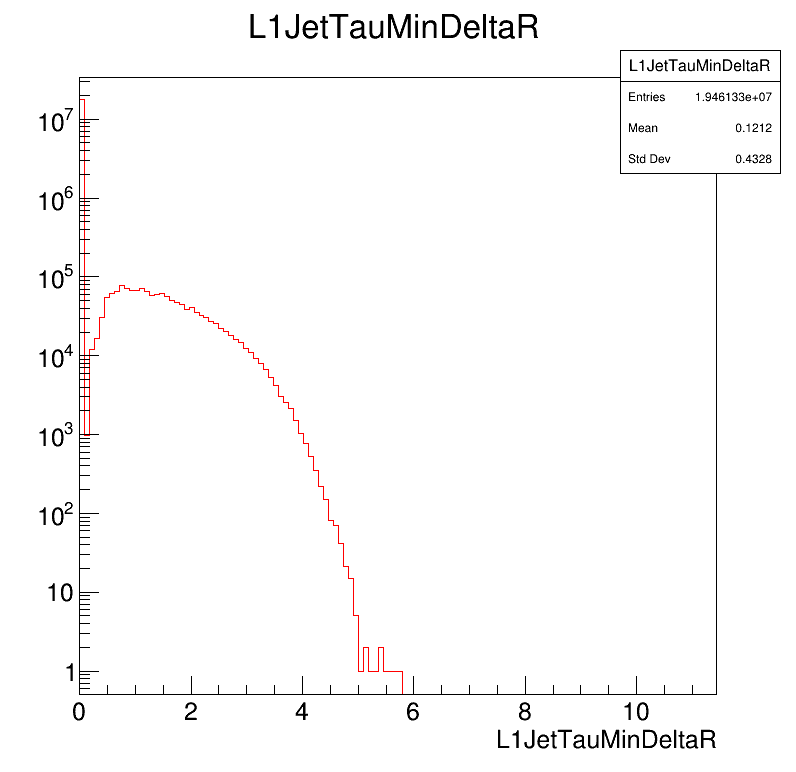

In [62]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = L1JetTauMinDeltaR.Clone()
#h2 = L1JetMaskedPt.Clone()

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
#h2.SetLineColor(ROOT.kBlue)

h1.Draw()
#h2.Draw("same")

c.SetLogy()
c.Draw()

In [9]:
gen_pt = df.Histo1D("GenVisTau_pt")
gen_pt_new = new_df.Histo1D("GenVisTau_pt")

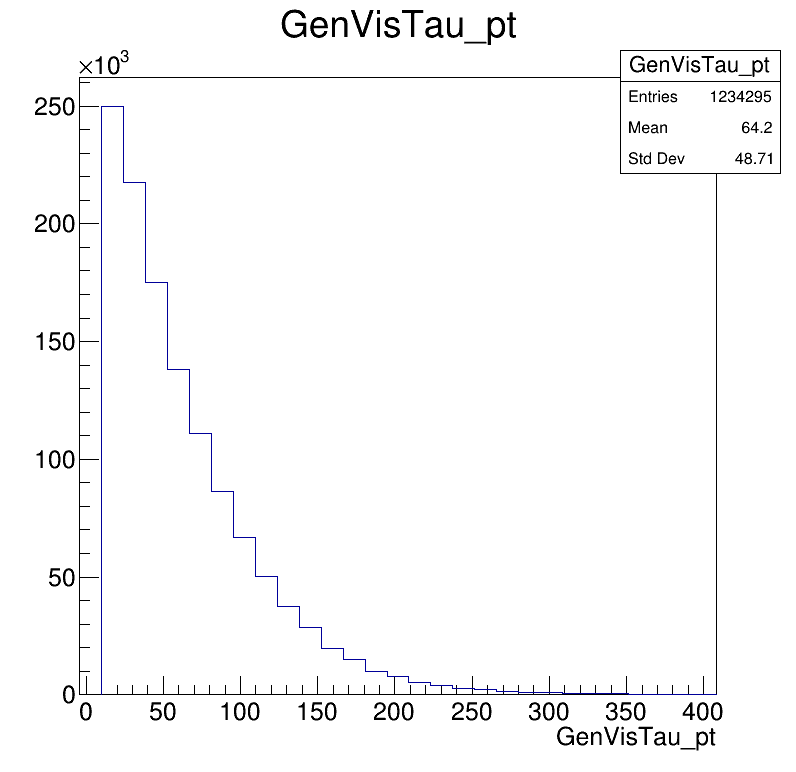

In [12]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = gen_pt.Clone()
hnew = gen_pt_new.Clone()

#h1.Divide(hnew)

h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()
hnew.Draw("same")

c.Draw()

In [26]:
plot = new_df.Define("size", 
    "(Tau_pt["
        "abs(Tau_eta) <= 2.1 "
        "&& Tau_pt >= 30"
        # "Tau_pt >= 30"
    "].size())").Histo1D("size")

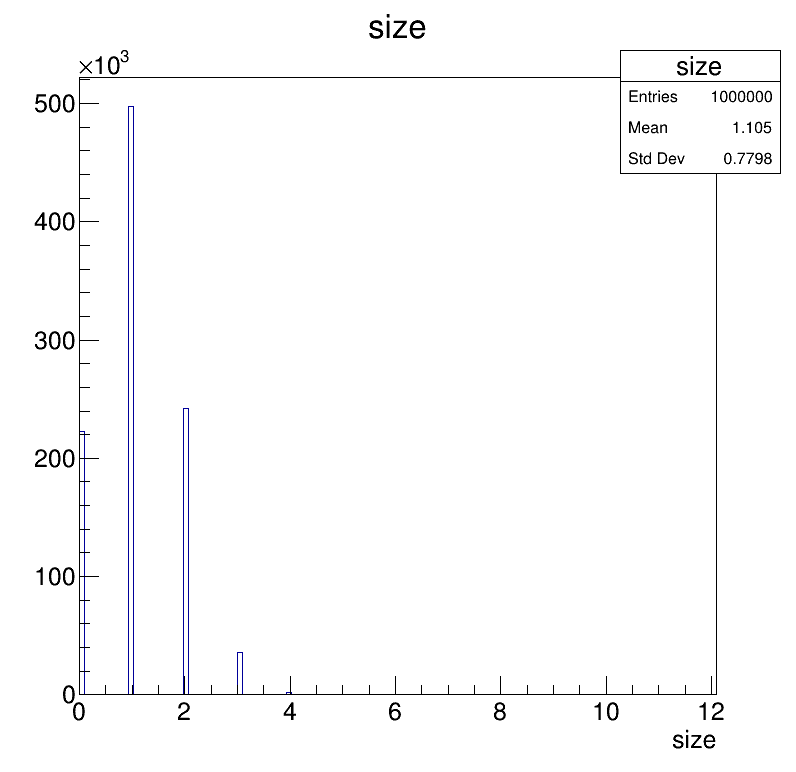

In [27]:
c = ROOT.TCanvas("", "", 800, 800)

h1 = plot.Clone()

#h1.Divide(hnew)

h1.GetXaxis().SetRangeUser(0, 400)

h1.Draw()

c.Draw()

In [21]:
def add_to_root(root):
    root.gInterpreter.Declare("""
        using Vfloat = const ROOT::RVec<float>&;      
        ROOT::RVec<float> lead_sublead_pt(Vfloat pt){
            ROOT::RVec<float> leading_pts;
            leading_pts.push_back(-1.);
            leading_pts.push_back(-1.);
            for (size_t i = 0; i < pt.size(); i++) {
                if (pt[i] > leading_pts[0]) {
                    leading_pts[1] = leading_pts[0];
                    leading_pts[0] = pt[i];
                } 
                else if (pt[i] > leading_pts[1])
                    leading_pts[1] = pt[i];
            }
            return leading_pts;
        }
    """)
    return root
ROOT = add_to_root(ROOT)

In [33]:
f_df = new_df.Filter("lead_sublead_pt(Jet_pt)[0] > 20 && lead_sublead_pt(Jet_pt)[1] > 20", "dijet")

In [34]:
f_df.Report().Print()

         : pass=998829     all=1000000    -- eff=99.88 % cumulative eff=99.88 %


In [ ]:
def process_df(df):
    histos = []
    for xx in range(20, 30):
        hmodel = ("", "", 1, 1, 2)
        name = "OfflineDoubleIsoTau{}er2p1".format(xx)
        histos.append(df.Define(name, 
            "(Tau_pt["
                "abs(Tau_eta) <= 2.1 "
                "&& Tau_pt >= {}"
            "].size() >= 2)".format(xx)
            ).Histo1D(hmodel, name)
        )

In [5]:
nu_process = Process("nu", "nu", color=(0, 0, 0))
nu = Dataset("nu",
             "/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/stempl/condor/menu_Nu_11_0_X_1614189426/",
             nu_process,
             skipFiles=["/eos/cms/store/group/dpg_trigger/comm_trigger/L1Trigger/stempl/condor/menu_Nu_11_0_X_1614189426//44.root"])
files = nu.get_files()
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
nu_df = ROOT.RDataFrame("l1UpgradeEmuTree/L1UpgradeTree", dataframe_files)

In [7]:
print [name for name in nu_df.GetColumnNames()]

['nEGs', 'egEt', 'egEta', 'egPhi', 'egIEt', 'egIEta', 'egIPhi', 'egIso', 'egBx', 'egTowerIPhi', 'egTowerIEta', 'egRawEt', 'egIsoEt', 'egFootprintEt', 'egNTT', 'egShape', 'egTowerHoE', 'egHwQual', 'nTaus', 'tauEt', 'tauEta', 'tauPhi', 'tauIEt', 'tauIEta', 'tauIPhi', 'tauIso', 'tauBx', 'tauTowerIPhi', 'tauTowerIEta', 'tauRawEt', 'tauIsoEt', 'tauNTT', 'tauHasEM', 'tauIsMerged', 'tauHwQual', 'nJets', 'jetEt', 'jetEta', 'jetPhi', 'jetIEt', 'jetIEta', 'jetIPhi', 'jetBx', 'jetTowerIPhi', 'jetTowerIEta', 'jetRawEt', 'jetSeedEt', 'jetPUEt', 'jetPUDonutEt0', 'jetPUDonutEt1', 'jetPUDonutEt2', 'jetPUDonutEt3', 'nMuons', 'muonEt', 'muonEtUnconstrained', 'muonEta', 'muonPhi', 'muonEtaAtVtx', 'muonPhiAtVtx', 'muonIEt', 'muonIEtUnconstrained', 'muonIEta', 'muonIPhi', 'muonIEtaAtVtx', 'muonIPhiAtVtx', 'muonIDEta', 'muonIDPhi', 'muonChg', 'muonIso', 'muonQual', 'muonDxy', 'muonTfMuonIdx', 'muonBx', 'nSums', 'sumType', 'sumEt', 'sumPhi', 'sumIEt', 'sumIPhi', 'sumBx', 'L1Upgrade']


In [11]:
hmodel = ("Subleading RecoTauPt","Subleading GenVisTau pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
subleading_pt = new_df.Define("Subleading_pt", "lead_sublead_pt(GenVisTau_pt)[1]").Histo1D(hmodel, "Subleading_pt")
hmodel = ("Leading RecoTauPt","Leading GenVisTau pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
leading_pt = new_df.Define("Leading_pt", "lead_sublead_pt(GenVisTau_pt)[0]").Histo1D(hmodel, "Leading_pt")

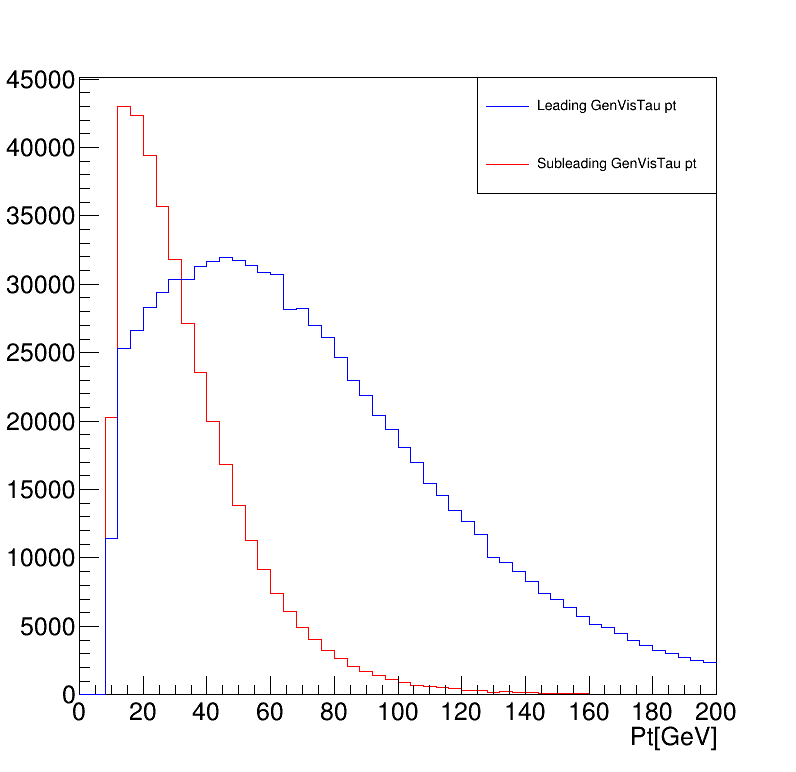

In [12]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)

h1 = subleading_pt.Clone()
hnew = leading_pt.Clone()

h1.SetTitle("")

#h1.Divide(hnew)

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)

h1.Draw()
hnew.Draw("same")

leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(hnew, "Leading GenVisTau pt", "l")
leg.AddEntry(h1, "Subleading GenVisTau pt", "l")
leg.Draw("same")

c.Draw()

In [28]:
hmodel = ("Subleading bjet Pt","Subleading bjet pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
subleading_jet_pt = new_df.Define("Subleading_jet_pt", "lead_sublead_pt(GenJet_pt)[1]").Histo1D(hmodel, "Subleading_jet_pt")
subleading_b_pt = new_df.Define("Subleading_b_pt", "lead_sublead_pt(GenJet_pt[GenJet_hadronFlavour == 4])[1]").Histo1D(hmodel, "Subleading_b_pt")
hmodel = ("Leading bjet Pt","Leading bjet pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
leading_jet_pt = new_df.Define("Leading_jet_pt", "lead_sublead_pt(GenJet_pt)[0]").Histo1D(hmodel, "Leading_jet_pt")
leading_b_pt = new_df.Define("Leading_b_pt", "lead_sublead_pt(GenJet_pt[GenJet_hadronFlavour == 4])[0]").Histo1D(hmodel, "Leading_b_pt")

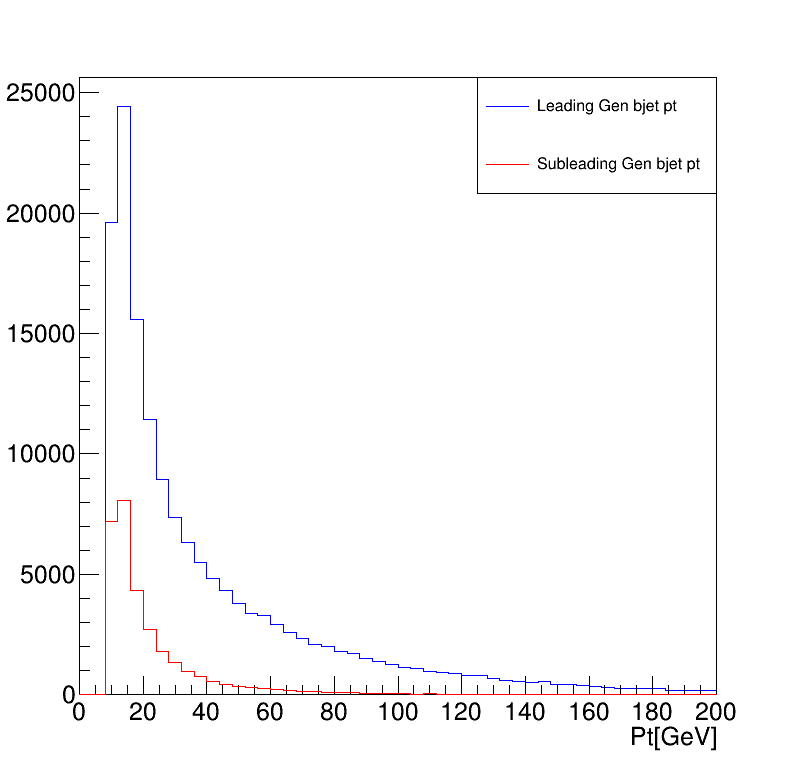

In [29]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)

h1 = subleading_b_pt.Clone()
hnew = leading_b_pt.Clone()

hnew.SetTitle("")

#h1.Divide(hnew)

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)

hnew.Draw()
h1.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(hnew, "Leading Gen bjet pt", "l")
leg.AddEntry(h1, "Subleading Gen bjet pt", "l")
leg.Draw("same")

c.Draw()

1000000.0
1000000.0


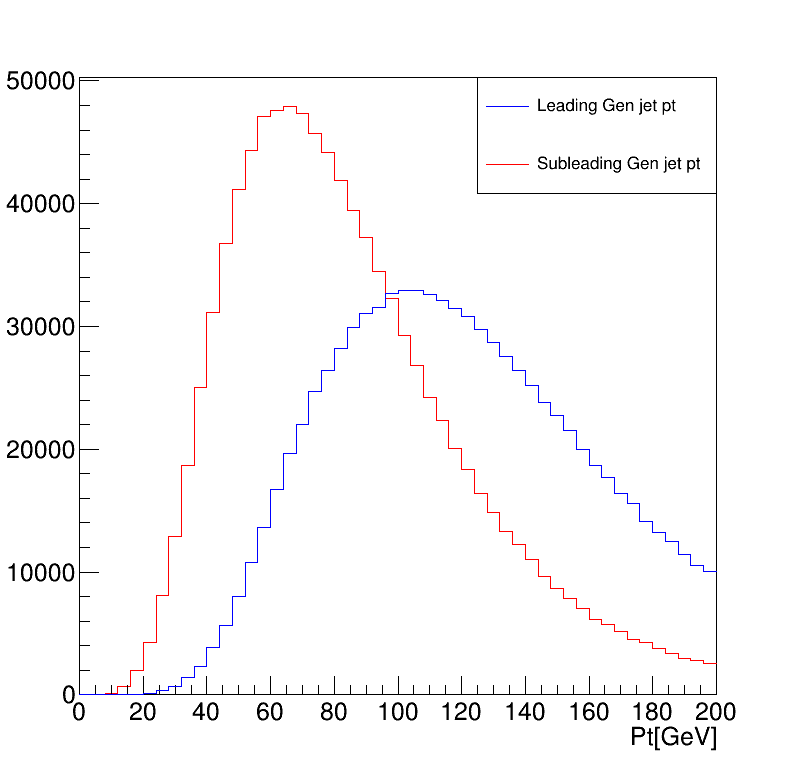

In [30]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)

h1 = subleading_jet_pt.Clone()
hnew = leading_jet_pt.Clone()

h1.SetTitle("")
hnew.SetTitle("")

#h1.Divide(hnew)

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)



h1.Draw()
hnew.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(hnew, "Leading Gen jet pt", "l")
leg.AddEntry(h1, "Subleading Gen jet pt", "l")
leg.Draw("same")

c.Draw()

print h1.GetEntries()
print hnew.GetEntries()

In [8]:
hmodel = ("Leading bjet Pt","Leading pt; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
leading_pt = nu_df.Define("Leading_pt", "lead_sublead_pt(tauEt)[0]").Histo1D("Leading_pt")

In [10]:
iso = nu_df.Histo1D("tauIso")

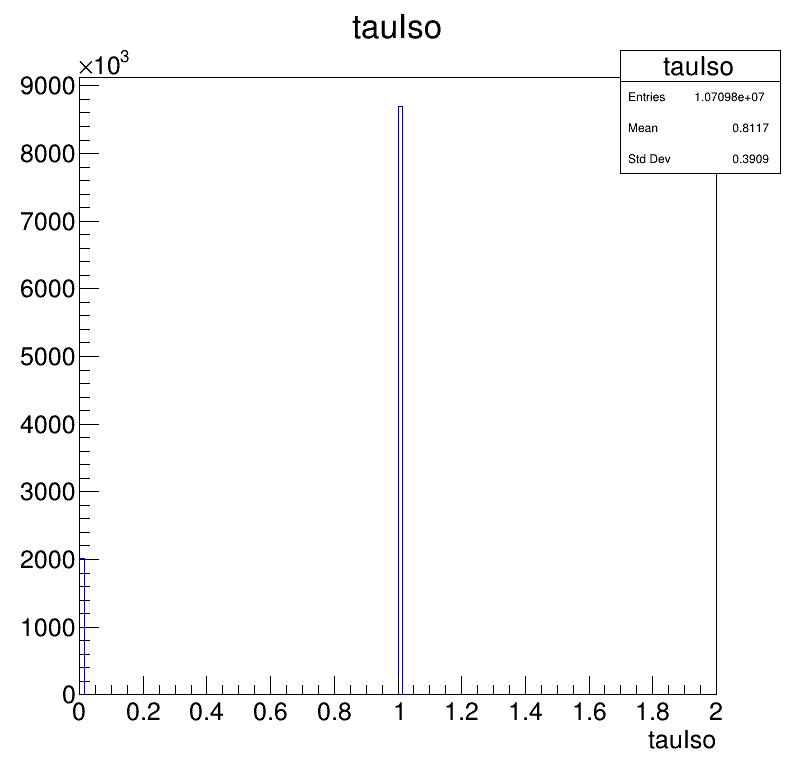

In [11]:
c = ROOT.TCanvas("", "", 800, 800)
iso.Draw()
c.Draw()

In [9]:
hmodel = ("","", 2, 0, 2.)
histo = nu_df.Define("pass", 
                "(tauEt["
                    "abs(tauEta) <= 2.1 "
                    "&& tauIso == 1 "
                    "&& tauEt >= 32"
                "].size() >= 2)").Histo1D(hmodel, "pass")

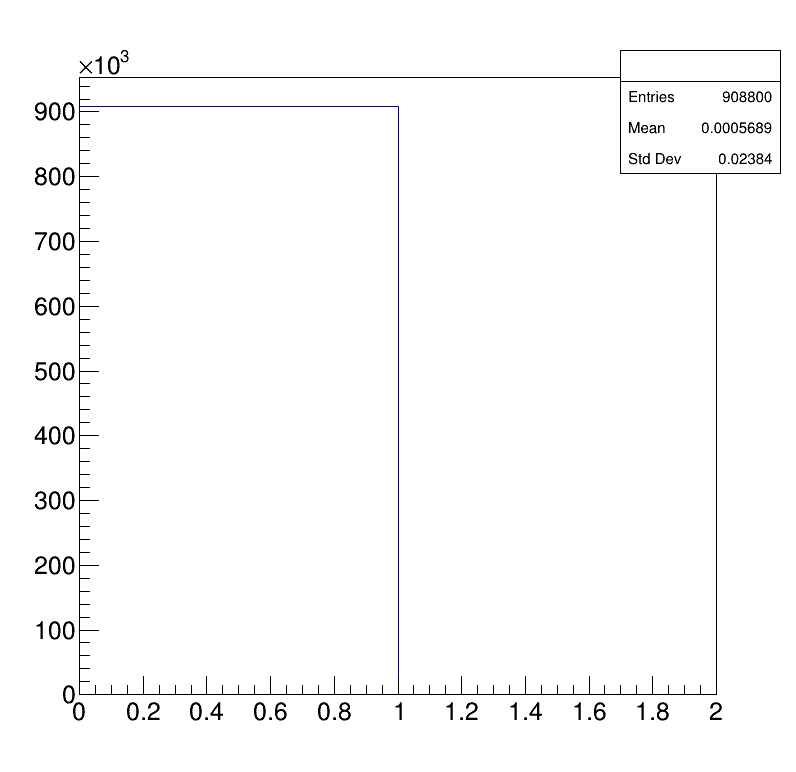

In [10]:
c = ROOT.TCanvas("", "", 800, 800)
histo.Draw()
c.Draw()

In [11]:
histo.GetBinContent(1)

908283.0

In [12]:
histo.GetBinContent(2)

517.0

In [15]:
rate = histo.GetBinContent(2) / (histo.GetBinContent(1) + histo.GetBinContent(2))

In [16]:
rate *= 2760. * 11246.

In [17]:
print rate

17657.5069542


In [8]:
histo = new_df.Histo1D("Jet_puId")

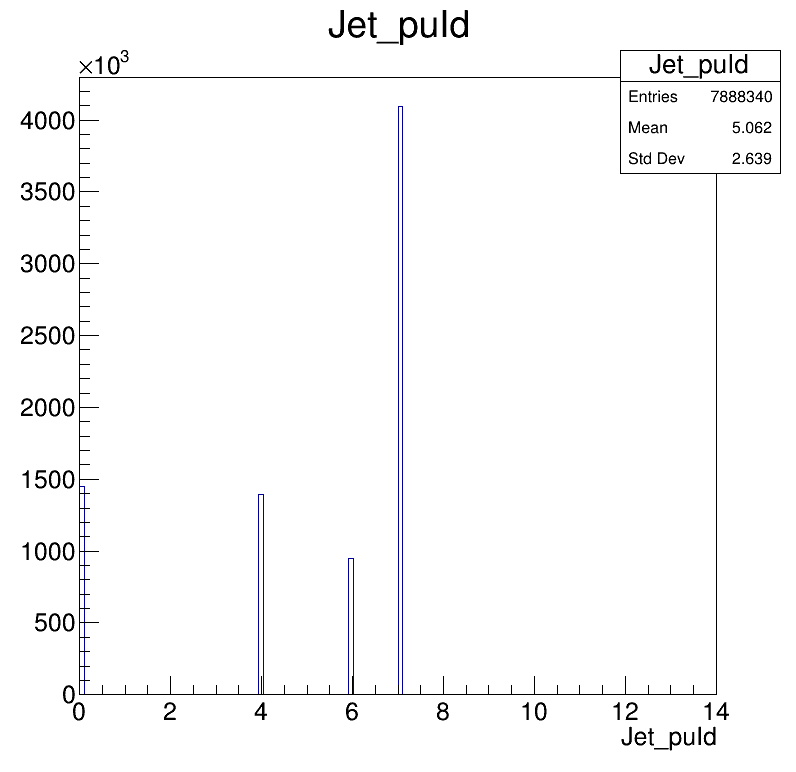

In [9]:
c = ROOT.TCanvas("", "", 800, 800)
histo.Draw()
c.Draw()

In [4]:
def add_to_root(root):
    root.gInterpreter.Declare("""
        using Vfloat = const ROOT::RVec<float>&;      
        ROOT::RVec<ROOT::RVec<float>> lead_sublead(Vfloat pt, Vfloat eta, Vfloat phi, Vfloat mass){
            ROOT::RVec<float> leading_pts = {-1., -1.};
            ROOT::RVec<float> leading_etas = {-1., -1.};
            ROOT::RVec<float> leading_phis = {-1., -1.};
            ROOT::RVec<float> leading_mass = {-1., -1.};
            for (size_t i = 0; i < pt.size(); i++) {
                if (pt[i] > leading_pts[0]){
                    leading_pts[1] = leading_pts[0];
                    leading_etas[1] = leading_etas[0];
                    leading_phis[1] = leading_phis[0];
                    leading_mass[1] = leading_mass[0];
    
                    leading_pts[0] = pt[i];
                    leading_etas[0] = eta[i];
                    leading_phis[0] = phi[i];
                    leading_mass[0] = mass[i];
                } 
                else if (pt[i] > leading_pts[1]){
                    leading_pts[1] = pt[i];
                    leading_etas[1] = eta[i];
                    leading_phis[1] = phi[i];
                    leading_mass[1] = mass[i];
                }
            }
            return ROOT::RVec({leading_pts, leading_etas, leading_phis, leading_mass});
        }
    """)
    root.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<bool> maskDeltaR(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float th_dr) {
        ROOT::RVec<bool> mask;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            bool bigger_deltar = true;
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                float this_deltar = fabs(v1.DeltaR(v2));
                if (abs(this_deltar) < th_dr) bigger_deltar = false;
            }
            mask.push_back(bigger_deltar);
        }
        return mask;
    }
""")
    return root
ROOT = add_to_root(ROOT)

In [5]:
ggf_bis = Dataset("ggf_sm_bis",
             "/eos/user/j/jleonhol/HH/htautau_ggf/",
             ggf_sm_process)


files = ggf_bis.get_files()[0:10]
#files = ["/eos/user/j/jleonhol/HH/htautau_ggf/NANO_NANO_188.root"]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
new_df = ROOT.RDataFrame("Events", dataframe_files)

In [12]:
f_df = new_df.Filter("Jet_pt[Jet_pt >= 30 && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 && ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))].size() >= 2")

In [6]:
new_df = (new_df.Define("lead_sublead_goodtau_pt",
    "lead_sublead("
        "Tau_pt[abs(Tau_eta) <= 2.1], "
        "Tau_eta[abs(Tau_eta) <= 2.1], "
        "Tau_phi[abs(Tau_eta) <= 2.1], "
        "Tau_mass[abs(Tau_eta) <= 2.1]"
    ")[0]").Define("lead_sublead_goodtau_eta", 
    "lead_sublead("
        "Tau_pt[abs(Tau_eta) <= 2.1], "
        "Tau_eta[abs(Tau_eta) <= 2.1], "
        "Tau_phi[abs(Tau_eta) <= 2.1], "
        "Tau_mass[abs(Tau_eta) <= 2.1]"
    ")[1]").Define("lead_sublead_goodtau_phi", 
    "lead_sublead("
        "Tau_pt[abs(Tau_eta) <= 2.1], "
        "Tau_eta[abs(Tau_eta) <= 2.1], "
        "Tau_phi[abs(Tau_eta) <= 2.1], "
        "Tau_mass[abs(Tau_eta) <= 2.1]"
    ")[2]").Define("lead_sublead_goodtau_mass", 
    "lead_sublead("
        "Tau_pt[abs(Tau_eta) <= 2.1], "
        "Tau_eta[abs(Tau_eta) <= 2.1], "
        "Tau_phi[abs(Tau_eta) <= 2.1], "
        "Tau_mass[abs(Tau_eta) <= 2.1]"
    ")[3]"))

In [7]:
new_df = (new_df.Define("lead_sublead_goodl1tau_pt",
    "lead_sublead("
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_eta[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_phi[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1]"
    ")[0]").Define("lead_sublead_goodl1tau_eta", 
    "lead_sublead("
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_eta[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_phi[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1]"
    ")[1]").Define("lead_sublead_goodl1tau_phi", 
    "lead_sublead("
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_eta[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_phi[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1]"
    ")[2]").Define("lead_sublead_goodl1tau_mass", 
    "lead_sublead("
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_eta[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_phi[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1], "
        "L1Obj_pt[L1Obj_type == 1 && L1Obj_iso == 1 && abs(Tau_eta) <= 2.1]"
    ")[3]"))


In [8]:
(xx, yy, zz)= (32, 26, 64)
name = "DoubleIsoTau{}er2p1Jet{}dR0p5".format(yy, zz)
hmodel = ("histo", "", 2, 0, 2)
histo = f_df.Define(name,
    "lead_sublead_goodtau_pt[0] >= ({0} + {1}) "
    "&& lead_sublead_goodtau_pt[1] >= ({0} + {2})"
    # ask for at least 1 jet with pt > zz (+ sth depending on the dataset)
    "&& (Jet_pt["
        "(Jet_pt >= ({3} + {4})) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
        "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
        "&& maskDeltaR("
            "Jet_pt, "
            "Jet_eta, "
            "Jet_phi, "
            "Jet_pt, " # dum, not needed for deltaR, just for LV
            "lead_sublead_goodtau_pt, "
            "lead_sublead_goodtau_eta, "
            "lead_sublead_goodtau_phi, "
            "lead_sublead_goodtau_mass, "
            "0.5)"
        "].size() >= 1)"
    "&& (Jet_pt["
        "(Jet_pt >= (20 + {4})) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
        "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
        "&& maskDeltaR("
            "Jet_pt, "
            "Jet_eta, "
            "Jet_phi, "
            "Jet_pt, "
            "lead_sublead_goodtau_pt, "
            "lead_sublead_goodtau_eta, "
            "lead_sublead_goodtau_phi, "
            "lead_sublead_goodtau_mass, "
            "0.5)"
        "].size() >= {5})"
    # ask for a number of jets depending on the category with pt > 20 (+ sth depending on the dataset)
    "&& (Jet_pt["
        "(Jet_pt >= (20 + {4})) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
        "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
        "&& maskDeltaR("
            "Jet_pt, "
            "Jet_eta, "
            "Jet_phi, "
            "Jet_pt, "
            "lead_sublead_goodtau_pt, "
            "lead_sublead_goodtau_eta, "
            "lead_sublead_goodtau_phi, "
            "lead_sublead_goodtau_mass, "
            "0.5)"
        "].size() <= {6})".format(
            yy, 
            18,
            8,
            zz,
            10,
            2,
            2
        )
    ).Histo1D(hmodel, name)

NameError: name 'f_df' is not defined

In [33]:
(xx, yy, zz)= (32, 26, 64)
hmodel = ("histo", "", 2, 0, 2)
new_df = new_df.Filter(
    "lead_sublead_goodtau_pt[0] >= (26 + 18) "
    "&& lead_sublead_goodtau_pt[1] >= (26 + 8)"
    "&& (Jet_pt["
            "(Jet_pt >= (20 + 10)) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
            "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
            "&& maskDeltaR("
                "Jet_pt, "
                "Jet_eta, "
                "Jet_phi, "
                "Jet_pt, "
                "lead_sublead_goodtau_pt, "
                "lead_sublead_goodtau_eta, "
                "lead_sublead_goodtau_phi, "
                "lead_sublead_goodtau_mass, "
                "0.5)"
     "].size() >= 2)"
     "&& (Jet_pt["
            "(Jet_pt >= (20 + 10)) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
            "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
            "&& maskDeltaR("
                "Jet_pt, "
                "Jet_eta, "
                "Jet_phi, "
                "Jet_pt, "
                "lead_sublead_goodtau_pt, "
                "lead_sublead_goodtau_eta, "
                "lead_sublead_goodtau_phi, "
                "lead_sublead_goodtau_mass, "
                "0.5)"
      "].size() <= 999)"
)


In [10]:
pt = new_df.Define(
    "L1GoodJetPt",
    "L1Obj_pt["
        "L1Obj_type == 0
        "&& abs(L1Obj_eta) < 4.7"
        "&& maskDeltaR("
            "L1Obj_pt, "
            "L1Obj_eta, "
            "L1Obj_phi, "
            "L1Obj_mass, "
            "lead_sublead_goodl1tau_pt, "
            "lead_sublead_goodl1tau_eta, "
            "lead_sublead_goodl1tau_phi, "
            "lead_sublead_goodl1tau_mass, "
    "]").Define(
    "L1LeadingJetPt",
    "lead_sublead(L1GoodJetPt, L1GoodJetPt, L1GoodJetPt, L1GoodJetPt)[0][0]"
    )

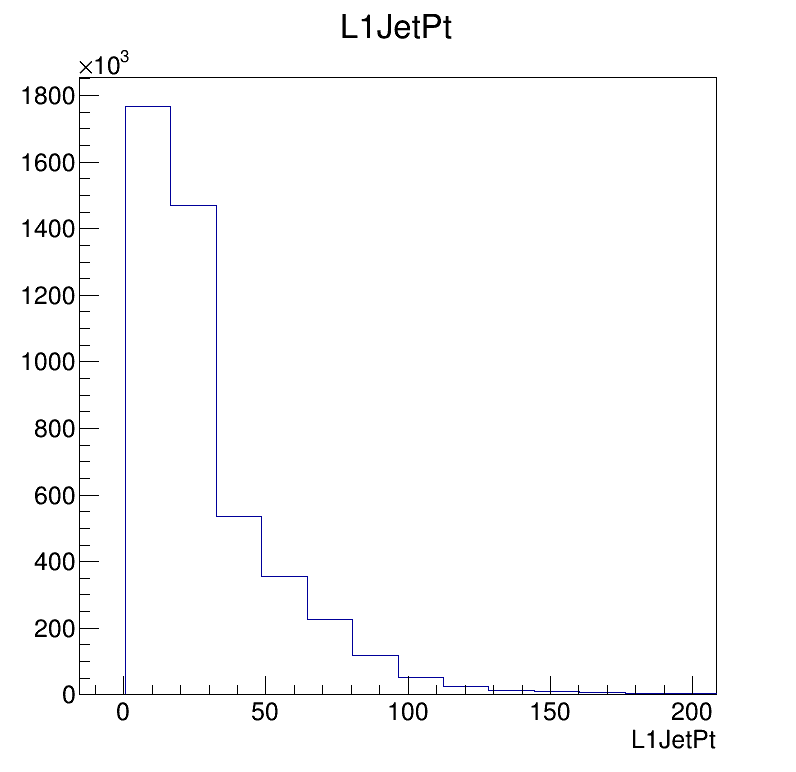

In [12]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)
h = pt.Clone()
h.GetXaxis().SetRangeUser(0, 200)
h.Draw()
c.Draw()
#histo.GetBinCont

In [41]:
histos = {}
pass_histos = {}
for zz in range(20, 160):
    hmodel = ("histo" + str(zz), "", 6, 0, 6)
    histos[zz] = new_df.Define("jet" + str(zz),
        # ask for at least 1 jet with pt > zz (+ sth depending on the dataset)
        "Jet_pt["
            "(Jet_pt >= ({0} + 10)) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
            "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
            "&& maskDeltaR("
                "Jet_pt, "
                "Jet_eta, "
                "Jet_phi, "
                "Jet_pt, " # dum, not needed for deltaR, just for LV
                "lead_sublead_goodtau_pt, "
                "lead_sublead_goodtau_eta, "
                "lead_sublead_goodtau_phi, "
                "lead_sublead_goodtau_mass, "
                "0.5)"
            "].size()".format(zz)
        ).Histo1D(hmodel, "jet" + str(zz))
    hmodel = ("passhisto" + str(zz), "", 2, 0, 2)
    pass_histos[zz] = new_df.Define("pass_jet" + str(zz),
        # ask for at least 1 jet with pt > zz (+ sth depending on the dataset)
        "Jet_pt["
            "(Jet_pt >= ({0} + 10)) && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 "
            "&& ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))"
            "&& maskDeltaR("
                "Jet_pt, "
                "Jet_eta, "
                "Jet_phi, "
                "Jet_pt, " # dum, not needed for deltaR, just for LV
                "lead_sublead_goodtau_pt, "
                "lead_sublead_goodtau_eta, "
                "lead_sublead_goodtau_phi, "
                "lead_sublead_goodtau_mass, "
                "0.5)"
            "].size() >= 1".format(zz)
        ).Histo1D(hmodel, "pass_jet" + str(zz))

In [42]:
histo2D = ROOT.TH2F("histo2D", "", 140, 20, 160, 6, 0, 6)
for zz in range(20, 160):
    for bin in range(0, 6):
#         print histos[zz].GetBinContent(bin + 1)
        histo2D.SetBinContent(zz - 20 + 1, bin + 1, histos[zz].GetBinContent(bin + 1))

In [43]:
passhisto2D = ROOT.TH2F("passhisto2D", "", 140, 20, 160, 2, 0, 2)
for zz in range(20, 160):
    for bin in range(0, 2):
        passhisto2D.SetBinContent(zz - 20 + 1, bin + 1, pass_histos[zz].GetBinContent(bin + 1))

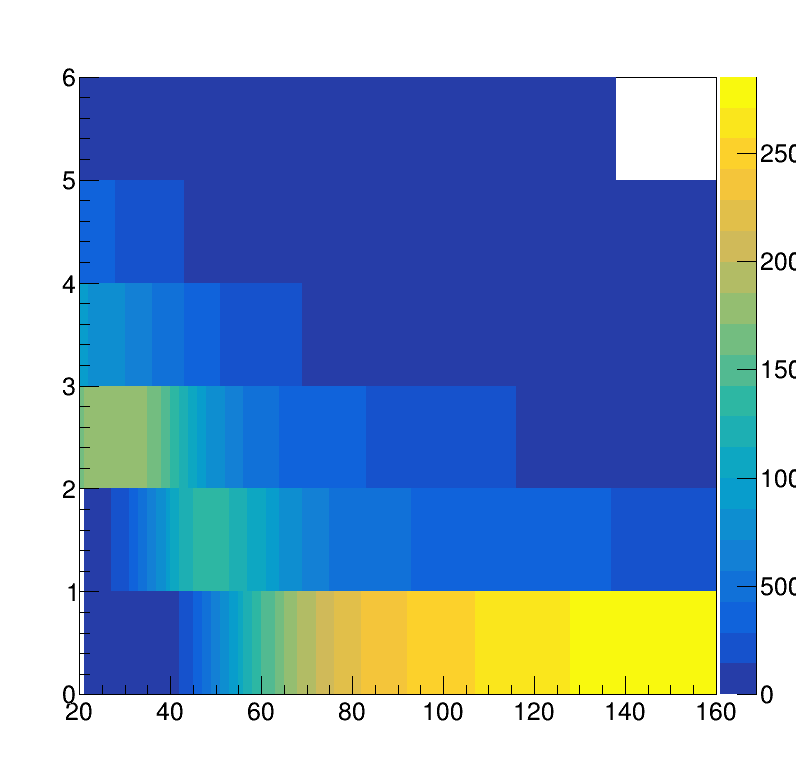

In [36]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)
h = histo2D.Clone()
h.Draw("colz")
c.Draw()
#histo.GetBinContent(2)

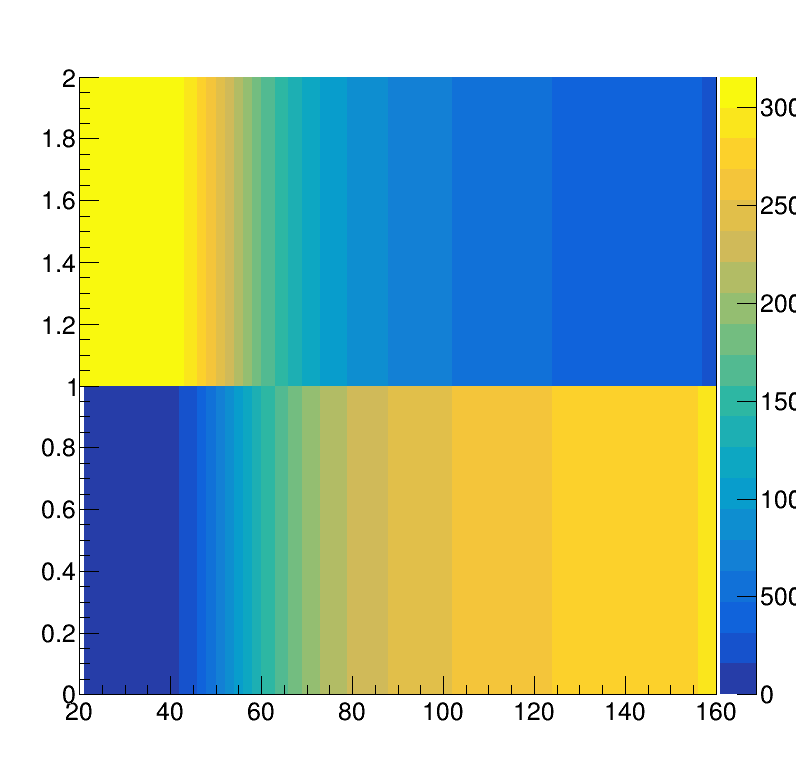

In [48]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)
h = passhisto2D.Clone()
h.Draw("colz")
c.Draw()
#histo.GetBinContent(2)

In [37]:
histo_prof = ROOT.TH1F("histo_prod", "", 140, 20, 160)
for zz in range(20, 160):
    num = sum([histo2D.GetBinContent(zz - 20 + 1, bin + 1) * bin for bin in range(0, 6)])
    den = sum([histo2D.GetBinContent(zz - 20 + 1, bin + 1)       for bin in range(0, 6)])
    histo_prof.SetBinContent(zz - 20 + 1,  0 if den == 0 else num / den)

In [46]:
histo_pass = ROOT.TH1F("histo_prod", "", 140, 20, 160)
for zz in range(20, 160):
    num = sum([passhisto2D.GetBinContent(zz - 20 + 1, bin + 1) * bin for bin in range(0, 6)])
    den = sum([passhisto2D.GetBinContent(zz - 20 + 1, bin + 1)       for bin in range(0, 6)])
    histo_pass.SetBinContent(zz - 20 + 1,  0 if den == 0 else num / den)

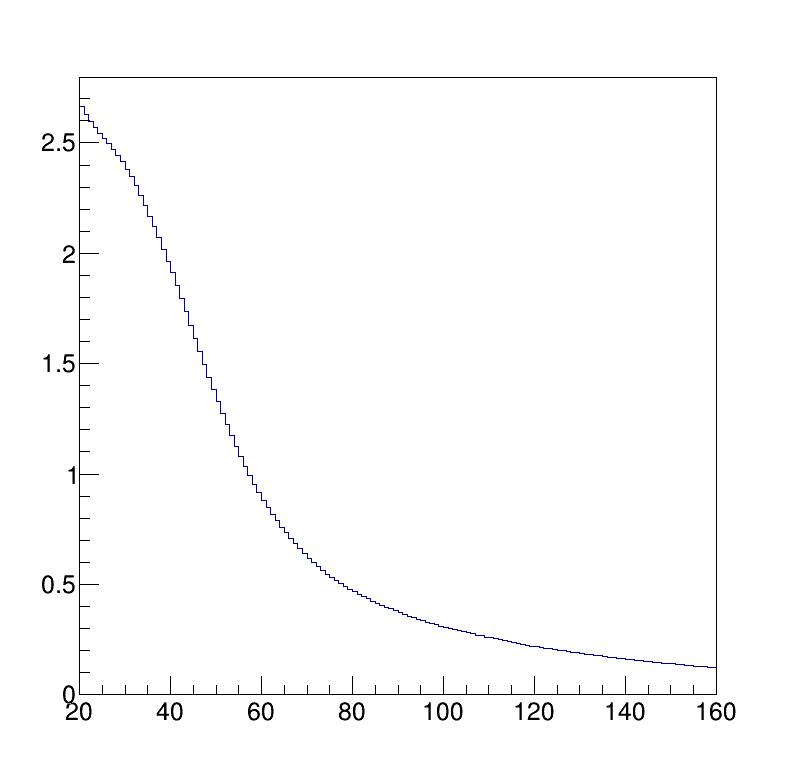

In [38]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)
h = histo_prof.Clone()
h.Draw()
c.Draw()

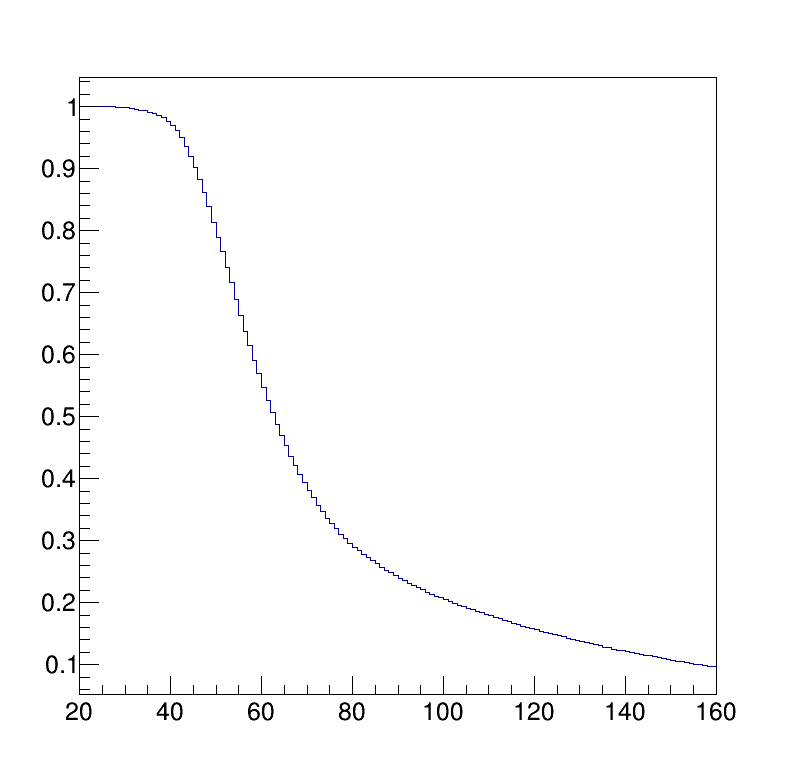

In [47]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)
h = histo_pass.Clone()
h.Draw()
c.Draw()

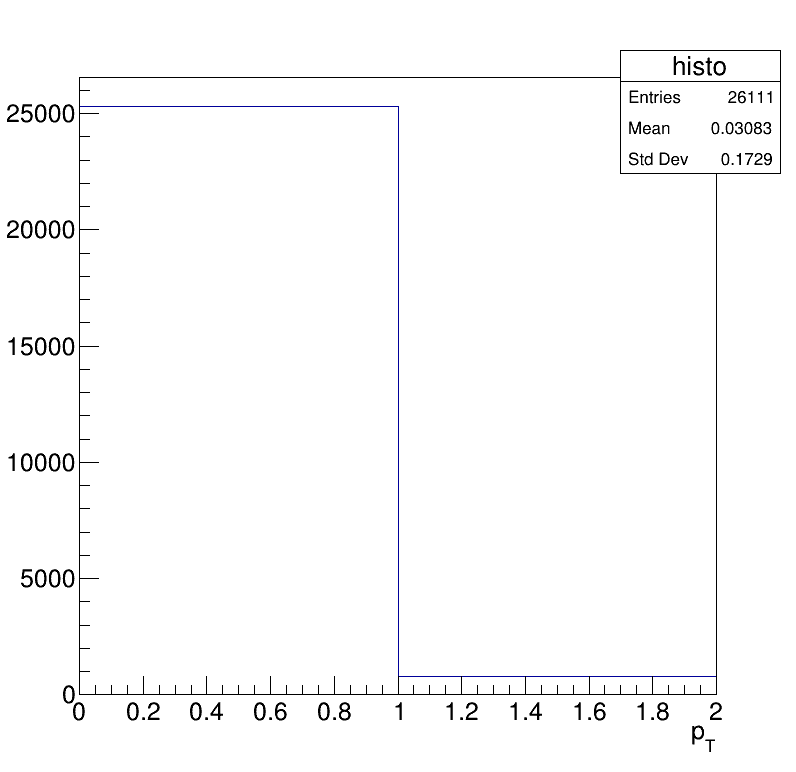

In [32]:
hmodel = ("histo", "; p_{T}; Events", 2, 0, 2)
#histo  = f_df.Define("LeadingJet_pt", "Jet_pt[Jet_pt >= 30 && abs(Jet_eta) <= 4.7 && Jet_jetId >= 2 && ((Jet_puId >= 4 && Jet_pt <= 50) || (Jet_pt > 50))]").Histo1D(hmodel, "LeadingJet_pt")
#histo = f_df.Histo1D(hmodel, "Tau_pt")
# histo  = f_df.Define("trig", "lead_sublead_pt(Tau_pt[abs(Tau_eta) < 2.1])[0] > 50"
#                      "&& lead_sublead_pt(Tau_pt[abs(Tau_eta) < 2.1])[1] > 40"
#                     ).Histo1D(hmodel, "trig")
histo  = f_df.Define("trig", 
                     "lead_sublead(Tau_pt[abs(Tau_eta) < 2.1], Tau_eta[abs(Tau_eta) < 2.1], Tau_phi[abs(Tau_eta) < 2.1], Tau_mass[abs(Tau_eta) < 2.1])[0][0] > 50"
                     "&& lead_sublead(Tau_pt[abs(Tau_eta) < 2.1], Tau_eta[abs(Tau_eta) < 2.1], Tau_phi[abs(Tau_eta) < 2.1], Tau_mass[abs(Tau_eta) < 2.1])[0][1] > 40"
                    ).Histo1D(hmodel, "trig")
c = ROOT.TCanvas("", "", 800, 800)
h = histo.Clone()
h.Draw()
c.Draw()

In [6]:
hmodel = ("Subleading","; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
subleading_pt = new_df.Define("Subleading_pt", "lead_sublead_pt(Jet_pt)[1]").Histo1D(hmodel, "Subleading_pt")
subleading_pt_2jets = f_df.Define("Subleading_pt", "lead_sublead_pt(Jet_pt)[1]").Histo1D(hmodel, "Subleading_pt")
hmodel = ("Leading","; Pt[GeV]; Events / 4 GeV", 50, 0., 200.)
leading_pt = new_df.Define("Leading_pt", "lead_sublead_pt(Jet_pt)[0]").Histo1D(hmodel, "Leading_pt")
leading_pt_2jets = f_df.Define("Leading_pt", "lead_sublead_pt(Jet_pt)[0]").Histo1D(hmodel, "Leading_pt")

TypeError: can not resolve method template call for 'Define'

input_line_101:2:8: error: use of undeclared identifier 'lead_sublead_pt'
return lead_sublead_pt(Jet_pt)[1]
       ^


12575000.0
12575000.0


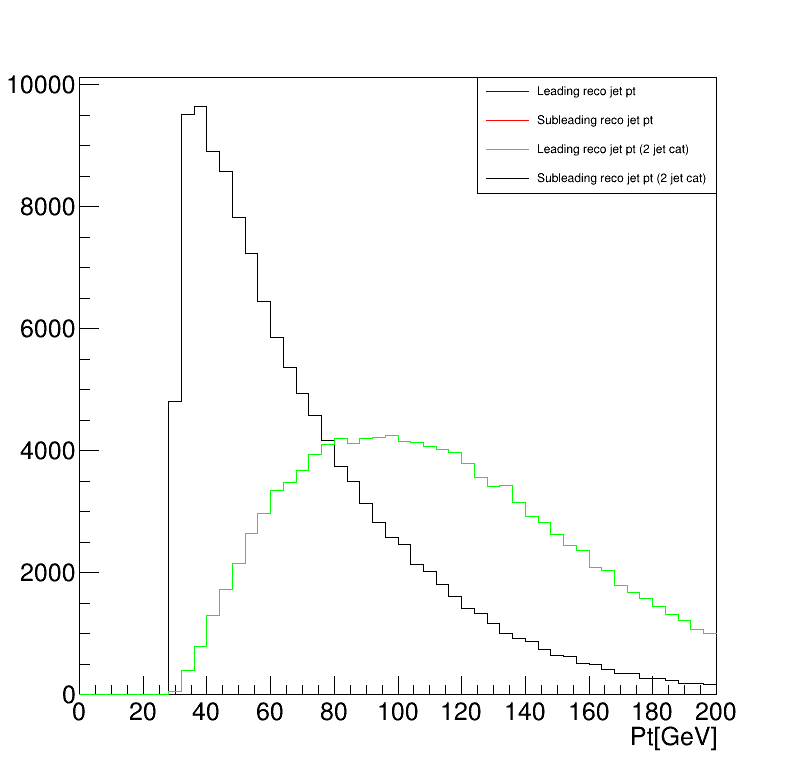

In [18]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)

h1 = subleading_pt.Clone()
hnew = leading_pt.Clone()

h1_f = subleading_pt_2jets.Clone()
hnew_f = leading_pt_2jets.Clone()

h1.SetTitle("")
hnew.SetTitle("")

#h1.Divide(hnew)

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)
h1_f.SetLineColor(ROOT.kBlack)
hnew_f.SetLineColor(ROOT.kGreen)


#h1.Draw()
#hnew.Draw("same")

h1_f.Draw("same")
hnew_f.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(hnew, "Leading reco jet pt", "l")
leg.AddEntry(h1, "Subleading reco jet pt", "l")
leg.AddEntry(hnew_f, "Leading reco jet pt (2 jet cat)", "l")
leg.AddEntry(h1_f, "Subleading reco jet pt (2 jet cat)", "l")
leg.Draw("same")

c.Draw()

print h1.GetEntries()
print hnew.GetEntries()

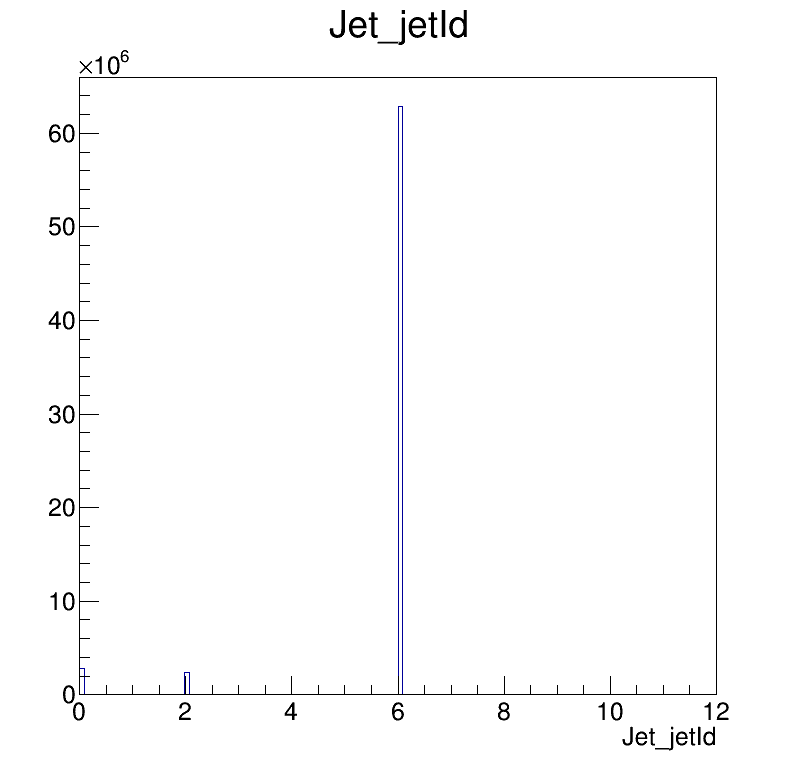

In [15]:
histo = new_df.Histo1D("Jet_jetId")
c = ROOT.TCanvas("", "", 800, 800)
histo.Draw()
c.Draw()

In [20]:
histo = new_df.Histo1D("Jet_puId")
histo_eff = new_df.Define("EffJet_puId", "efficient_feat(Jet_puId, Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass, 0.4)").Histo1D("EffJet_puId")

68142944.0
35987781.0


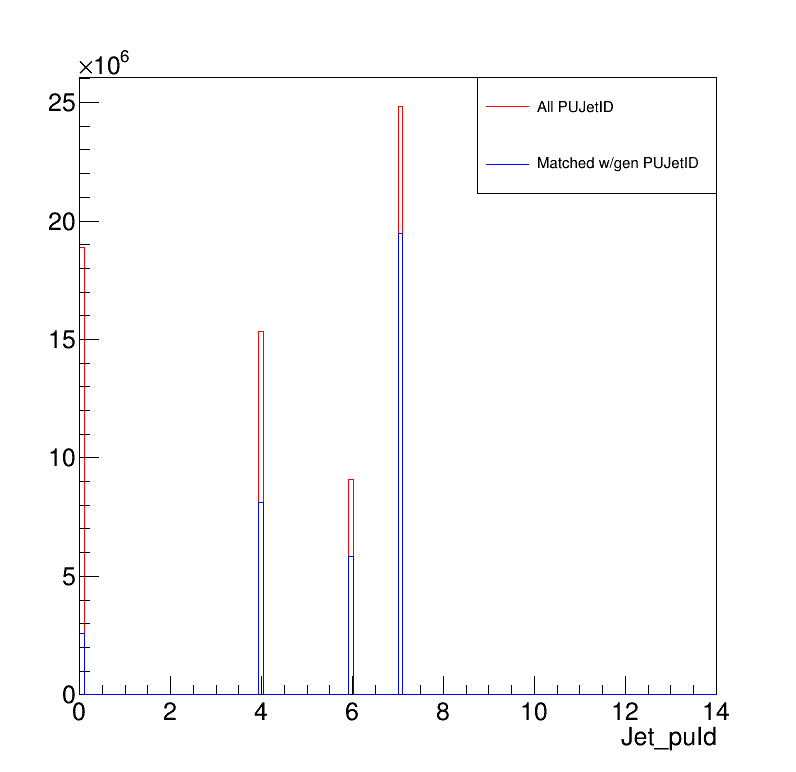

In [22]:
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("", "", 800, 800)

h1 = histo.Clone()
hnew = histo_eff.Clone()

h1.SetTitle("")
hnew.SetTitle("")

#h1.Divide(hnew)

#h1.GetXaxis().SetRangeUser(0, 400)

h1.SetLineColor(ROOT.kRed)
hnew.SetLineColor(ROOT.kBlue)



h1.Draw()
hnew.Draw("same")



leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "All PUJetID", "l")
leg.AddEntry(hnew, "Matched w/gen PUJetID", "l")
leg.Draw("same")

c.Draw()

print h1.GetEntries()
print hnew.GetEntries()